## Learning Outcomes
- Exploratory data analysis & preparing the data for model building. 
- Machine Learning - Supervised Learning Classification
  - Logistic Regression
  - Naive bayes Classifier
  - KNN Classifier
  - Decision Tree Classifier
  - Random Forest Classifier
  - Ensemble methods
- Training and making predictions using different classification models.
- Model evaluation

## Objective: 
- The Classification goal is to predict “heart disease” in a person with regards to different factors given. 

## Context:
- Heart disease is one of the leading causes of death for people of most races in the US. At least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. 
- Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Machine learning methods may detect "patterns" from the data and can predict whether a patient is suffering from any heart disease or not..

## Dataset Information

#### Source: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?datasetId=1936563&sortBy=voteCount
Originally, the dataset come from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents. 

This dataset consists of eighteen columns
- HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
- BMI: Body Mass Index (BMI)
- Smoking: smoked at least 100 cigarettes in your entire life
- AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
- Stroke:Ever had a stroke?
- PhysicalHealth: physical health, which includes physical illness and injury
- MentalHealth: for how many days during the past 30 days was your mental health not good?
- DiffWalking: Do you have serious difficulty walking or climbing stairs?
- Sex: male or female?
- AgeCategory: Fourteen-level age category
- Race: Imputed race/ethnicity value
- Diabetic: diabetes?
- PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
- GenHealth: Would you say that in general your health is good, fine or excellent?
- SleepTime: On average, how many hours of sleep do you get in a 24-hour period?
- Asthma: you had asthma?
- KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
- SkinCancer: Ever had skin cancer?

### 1. Importing Libraries

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns


from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler  
from sklearn.linear_model import LogisticRegression  
from sklearn.naive_bayes import GaussianNB  
from sklearn.neighbors import KNeighborsClassifier  # For KNN Classifier
from sklearn.tree import DecisionTreeClassifier  # For Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier  # For Random Forest Classifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # For model evaluation
from sklearn.preprocessing import LabelEncoder 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier



### 2. Load the dataset and display a sample of five rows of the data frame.

In [2]:
df = pd.read_csv(r"C:\Users\SANATH\Downloads\heart_2020_cleaned.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


### 3. Check the shape of the data (number of rows and columns). Check the general information about the dataframe using the .info() method.

In [3]:
df.shape

(319795, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

### 4. Check the statistical summary of the dataset and write your inferences.

In [5]:
df.describe(include='all')

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795,319795.000000,319795,319795,319795,319795.00000,319795.000000,319795,319795,319795,319795,319795,319795,319795,319795.000000,319795,319795,319795
unique,2,NaN,2,2,2,NaN,NaN,2,2,13,6,4,2,5,NaN,2,2,2
top,No,NaN,No,No,No,NaN,NaN,No,Female,65-69,White,No,Yes,Very good,NaN,No,No,No
freq,292422,NaN,187887,298018,307726,NaN,NaN,275385,167805,34151,245212,269653,247957,113858,NaN,276923,308016,289976
mean,NaN,28.325399,NaN,NaN,NaN,3.37171,3.898366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.097075,NaN,NaN,NaN
std,NaN,6.356100,NaN,NaN,NaN,7.95085,7.955235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436007,NaN,NaN,NaN
min,NaN,12.020000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,24.030000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN
50%,NaN,27.340000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN
75%,NaN,31.420000,NaN,NaN,NaN,2.00000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN


### 5. Check the percentage of missing values in each column of the data frame. Drop the missing values if there are any.

In [6]:
per_of_miss_val = (df.isnull().sum() / len(df))*100
print("Percentage of Missing values: ")
print(per_of_miss_val)

Percentage of Missing values: 
HeartDisease        0.0
BMI                 0.0
Smoking             0.0
AlcoholDrinking     0.0
Stroke              0.0
PhysicalHealth      0.0
MentalHealth        0.0
DiffWalking         0.0
Sex                 0.0
AgeCategory         0.0
Race                0.0
Diabetic            0.0
PhysicalActivity    0.0
GenHealth           0.0
SleepTime           0.0
Asthma              0.0
KidneyDisease       0.0
SkinCancer          0.0
dtype: float64


### 6. Check if there are any duplicate rows. If any drop them and check the shape of the dataframe after dropping duplicates.

In [7]:
dup_rows = df[df.duplicated()]
print("Length of dup rows:", len(dup_rows))

Length of dup rows: 18078


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(301717, 18)

### 7. Check the distribution of the target variable (i.e. 'HeartDisease') and write your observations.

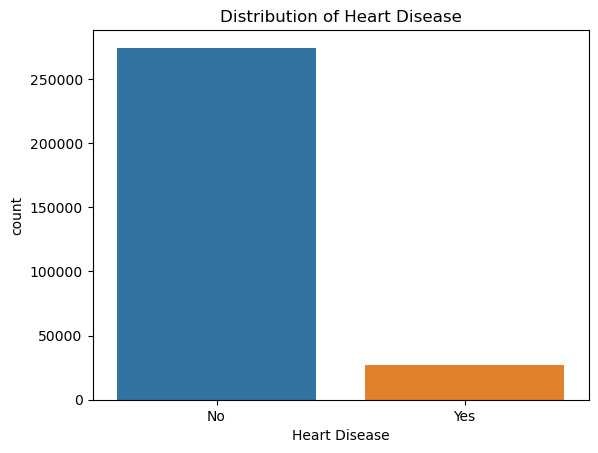

In [10]:
sns.countplot(x='HeartDisease', data=df)
plt.title("Distribution of Heart Disease")
plt.xlabel("Heart Disease")
plt.ylabel("count")
plt.show()

### 8. Visualize the distribution of the target column 'Heart disease' with respect to various categorical features and write your observations.

C:\Users\SANATH\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


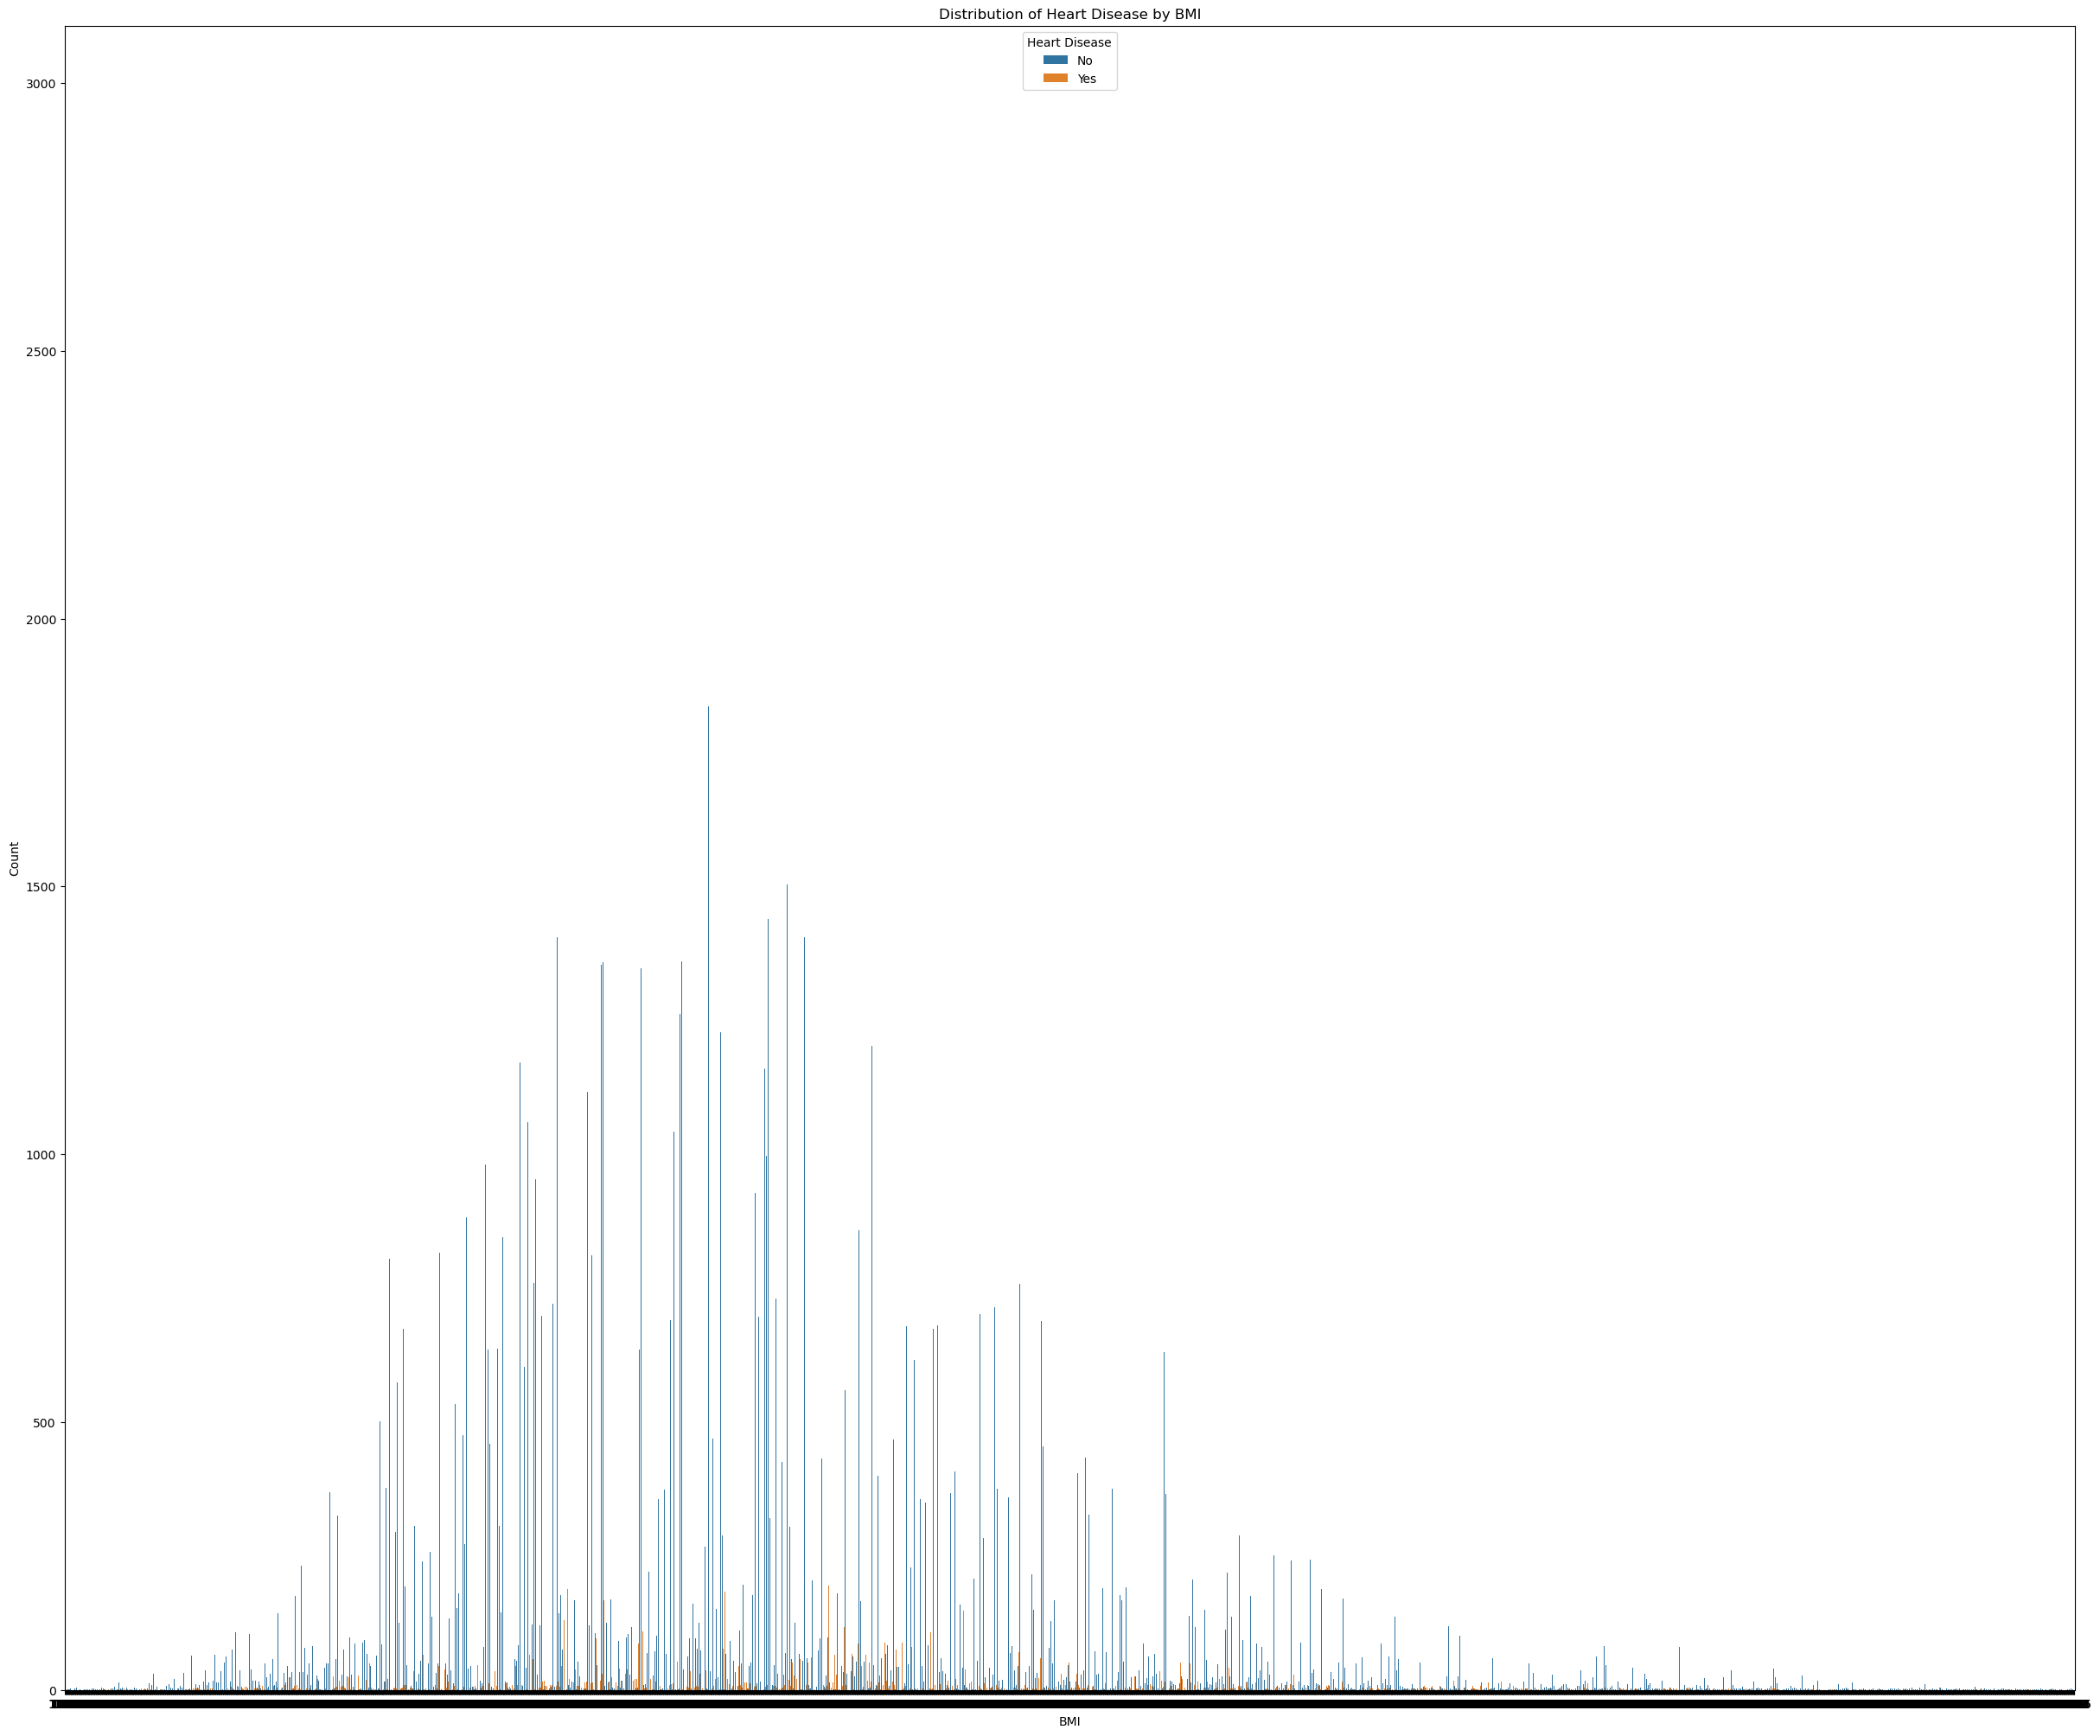

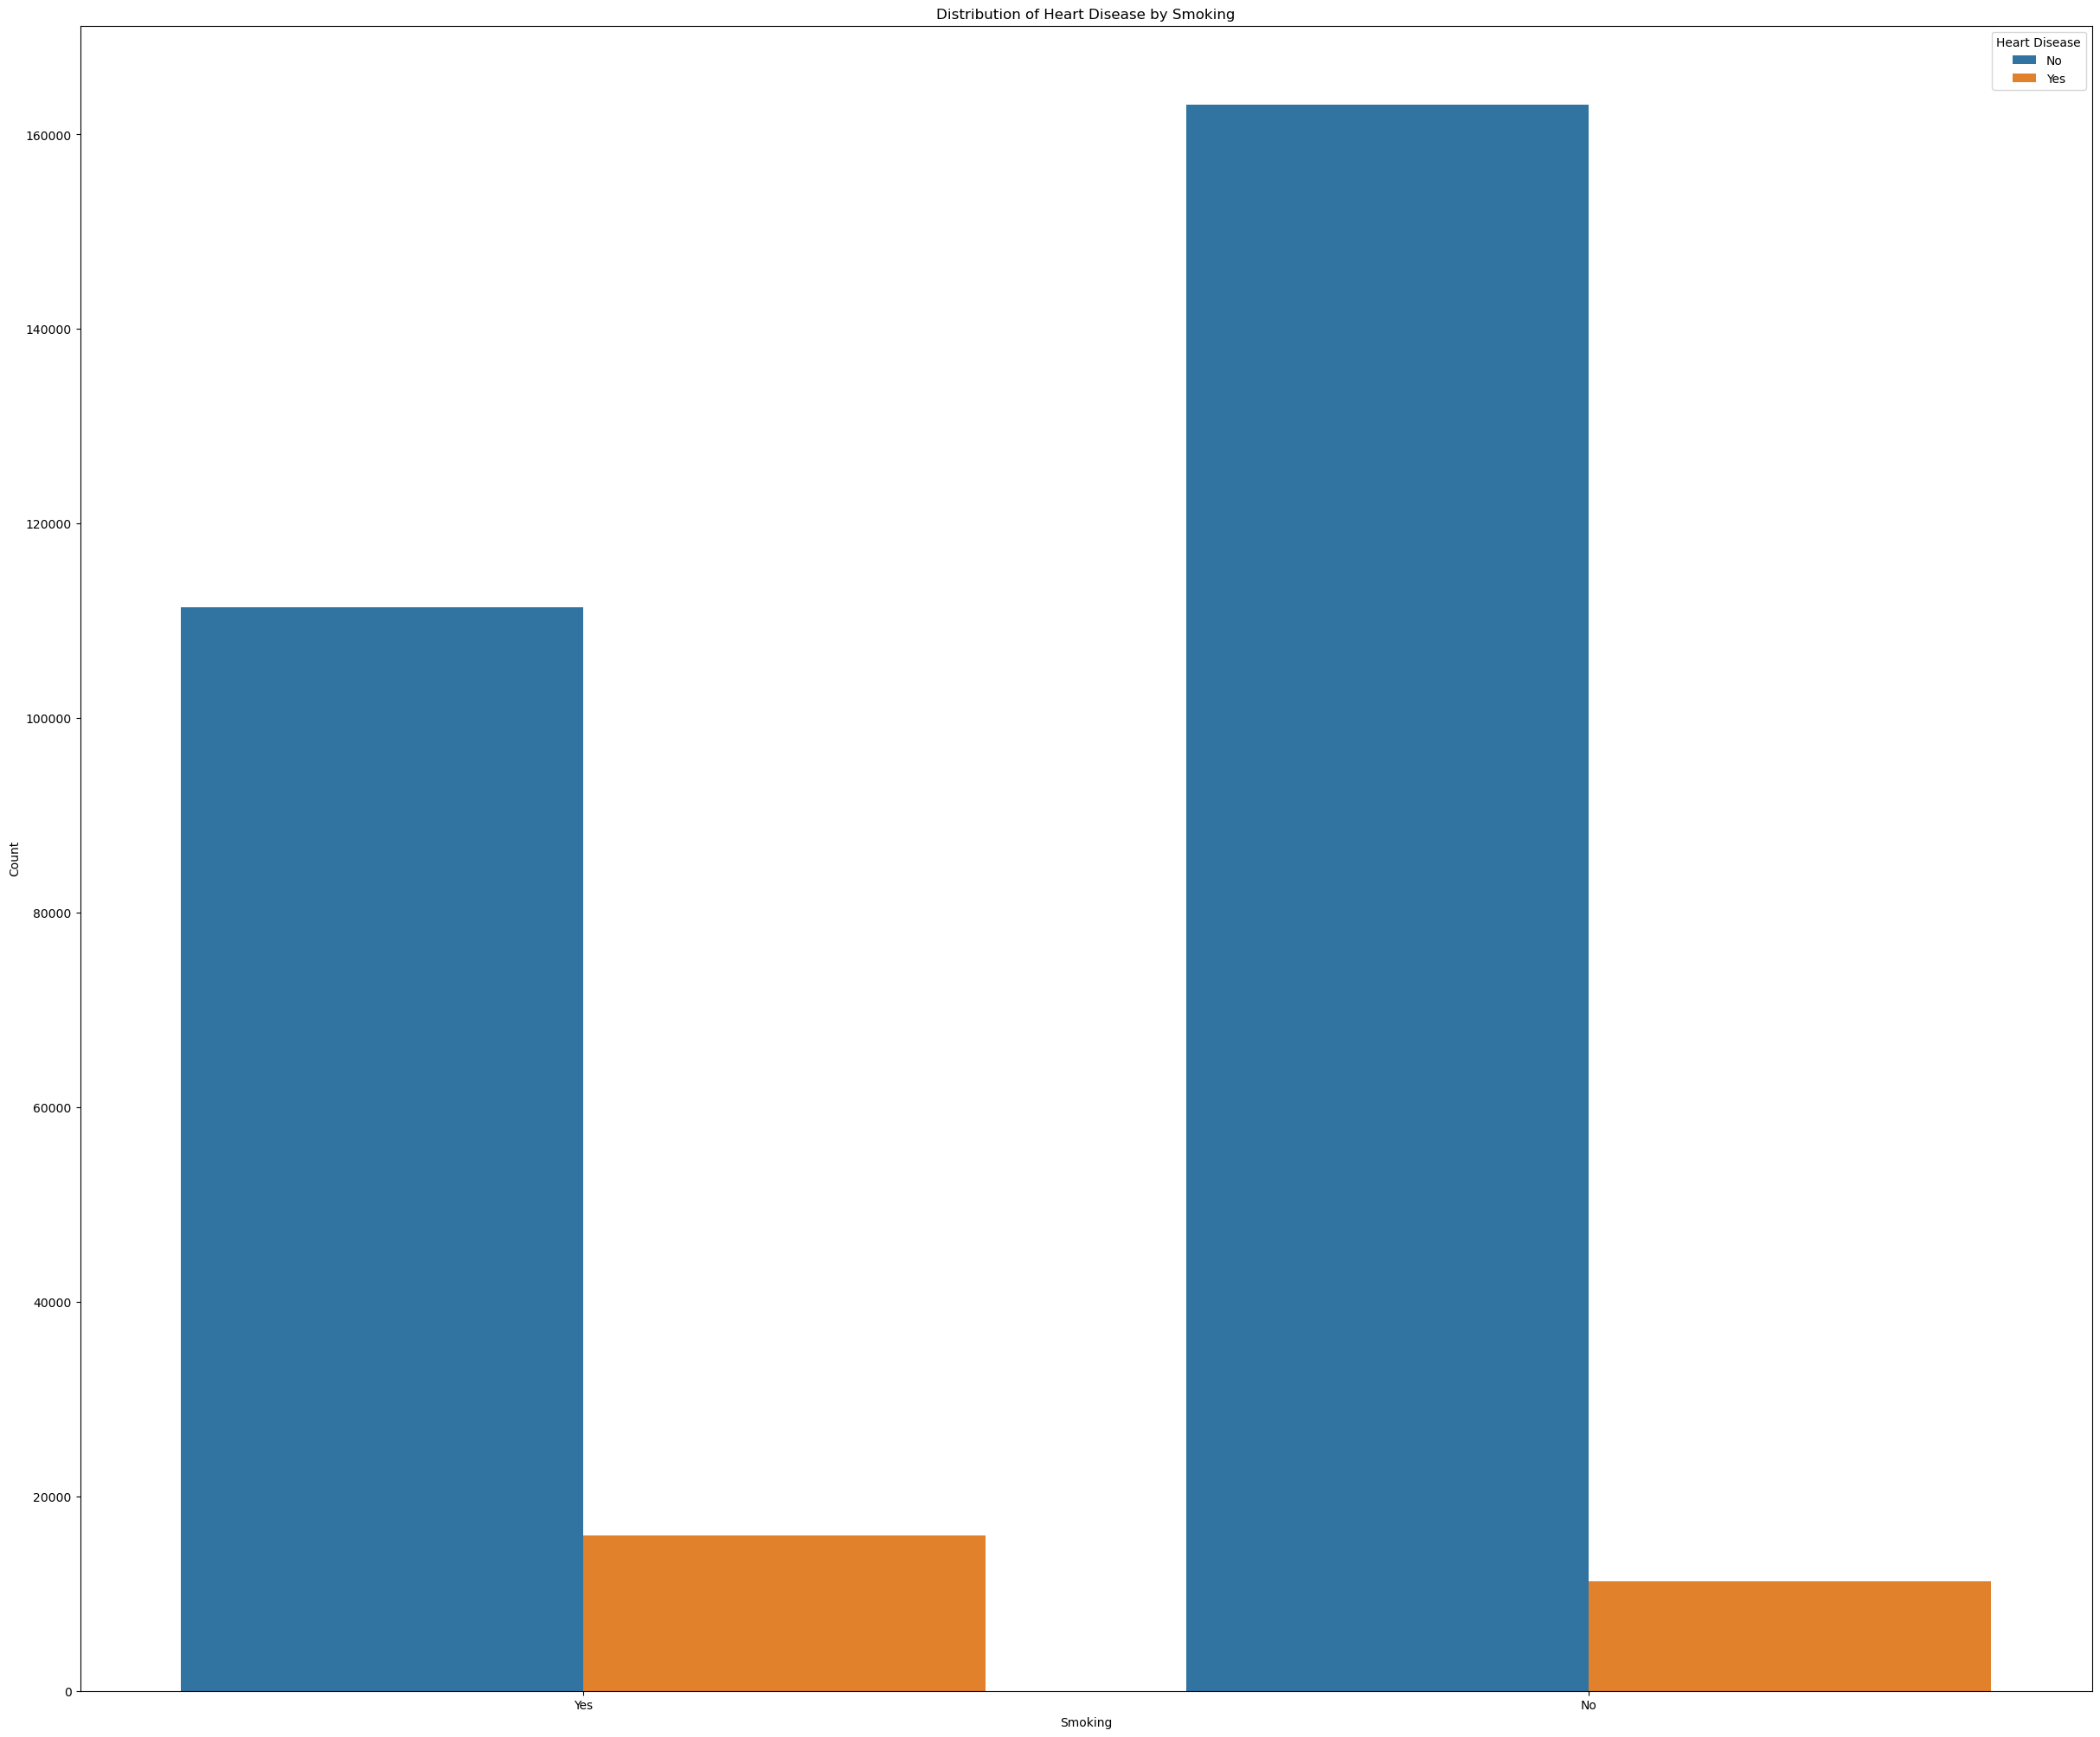

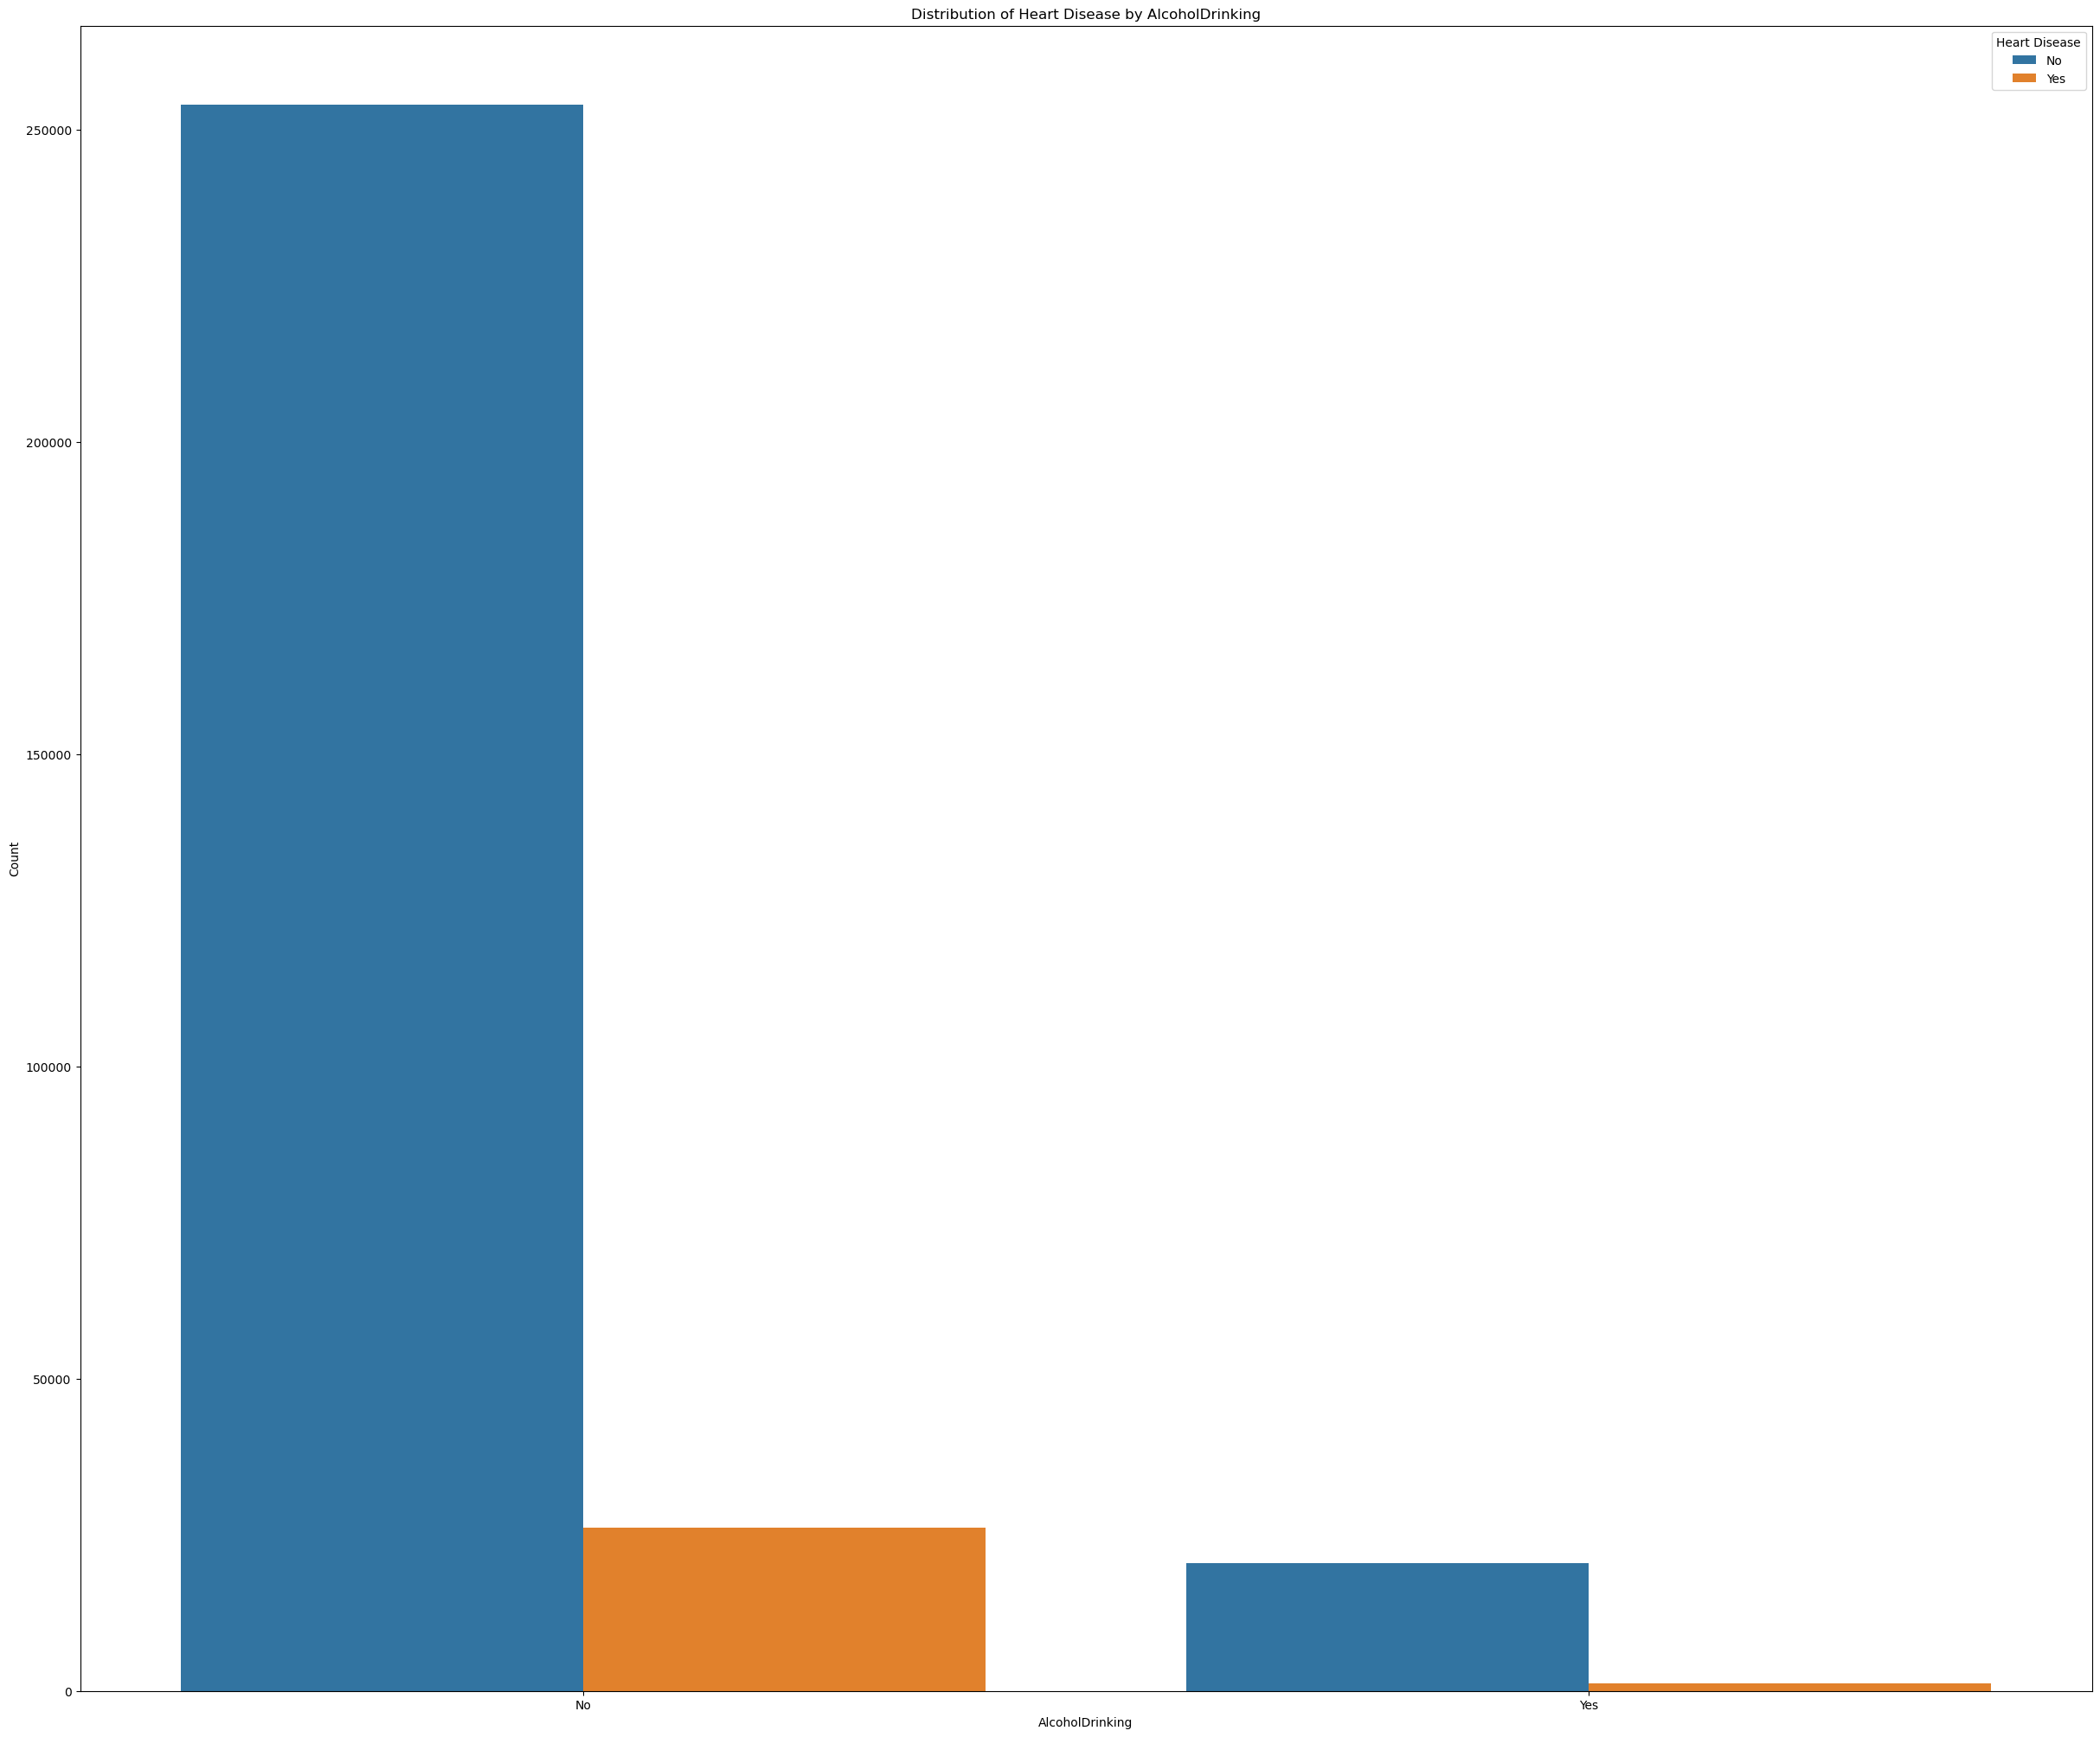

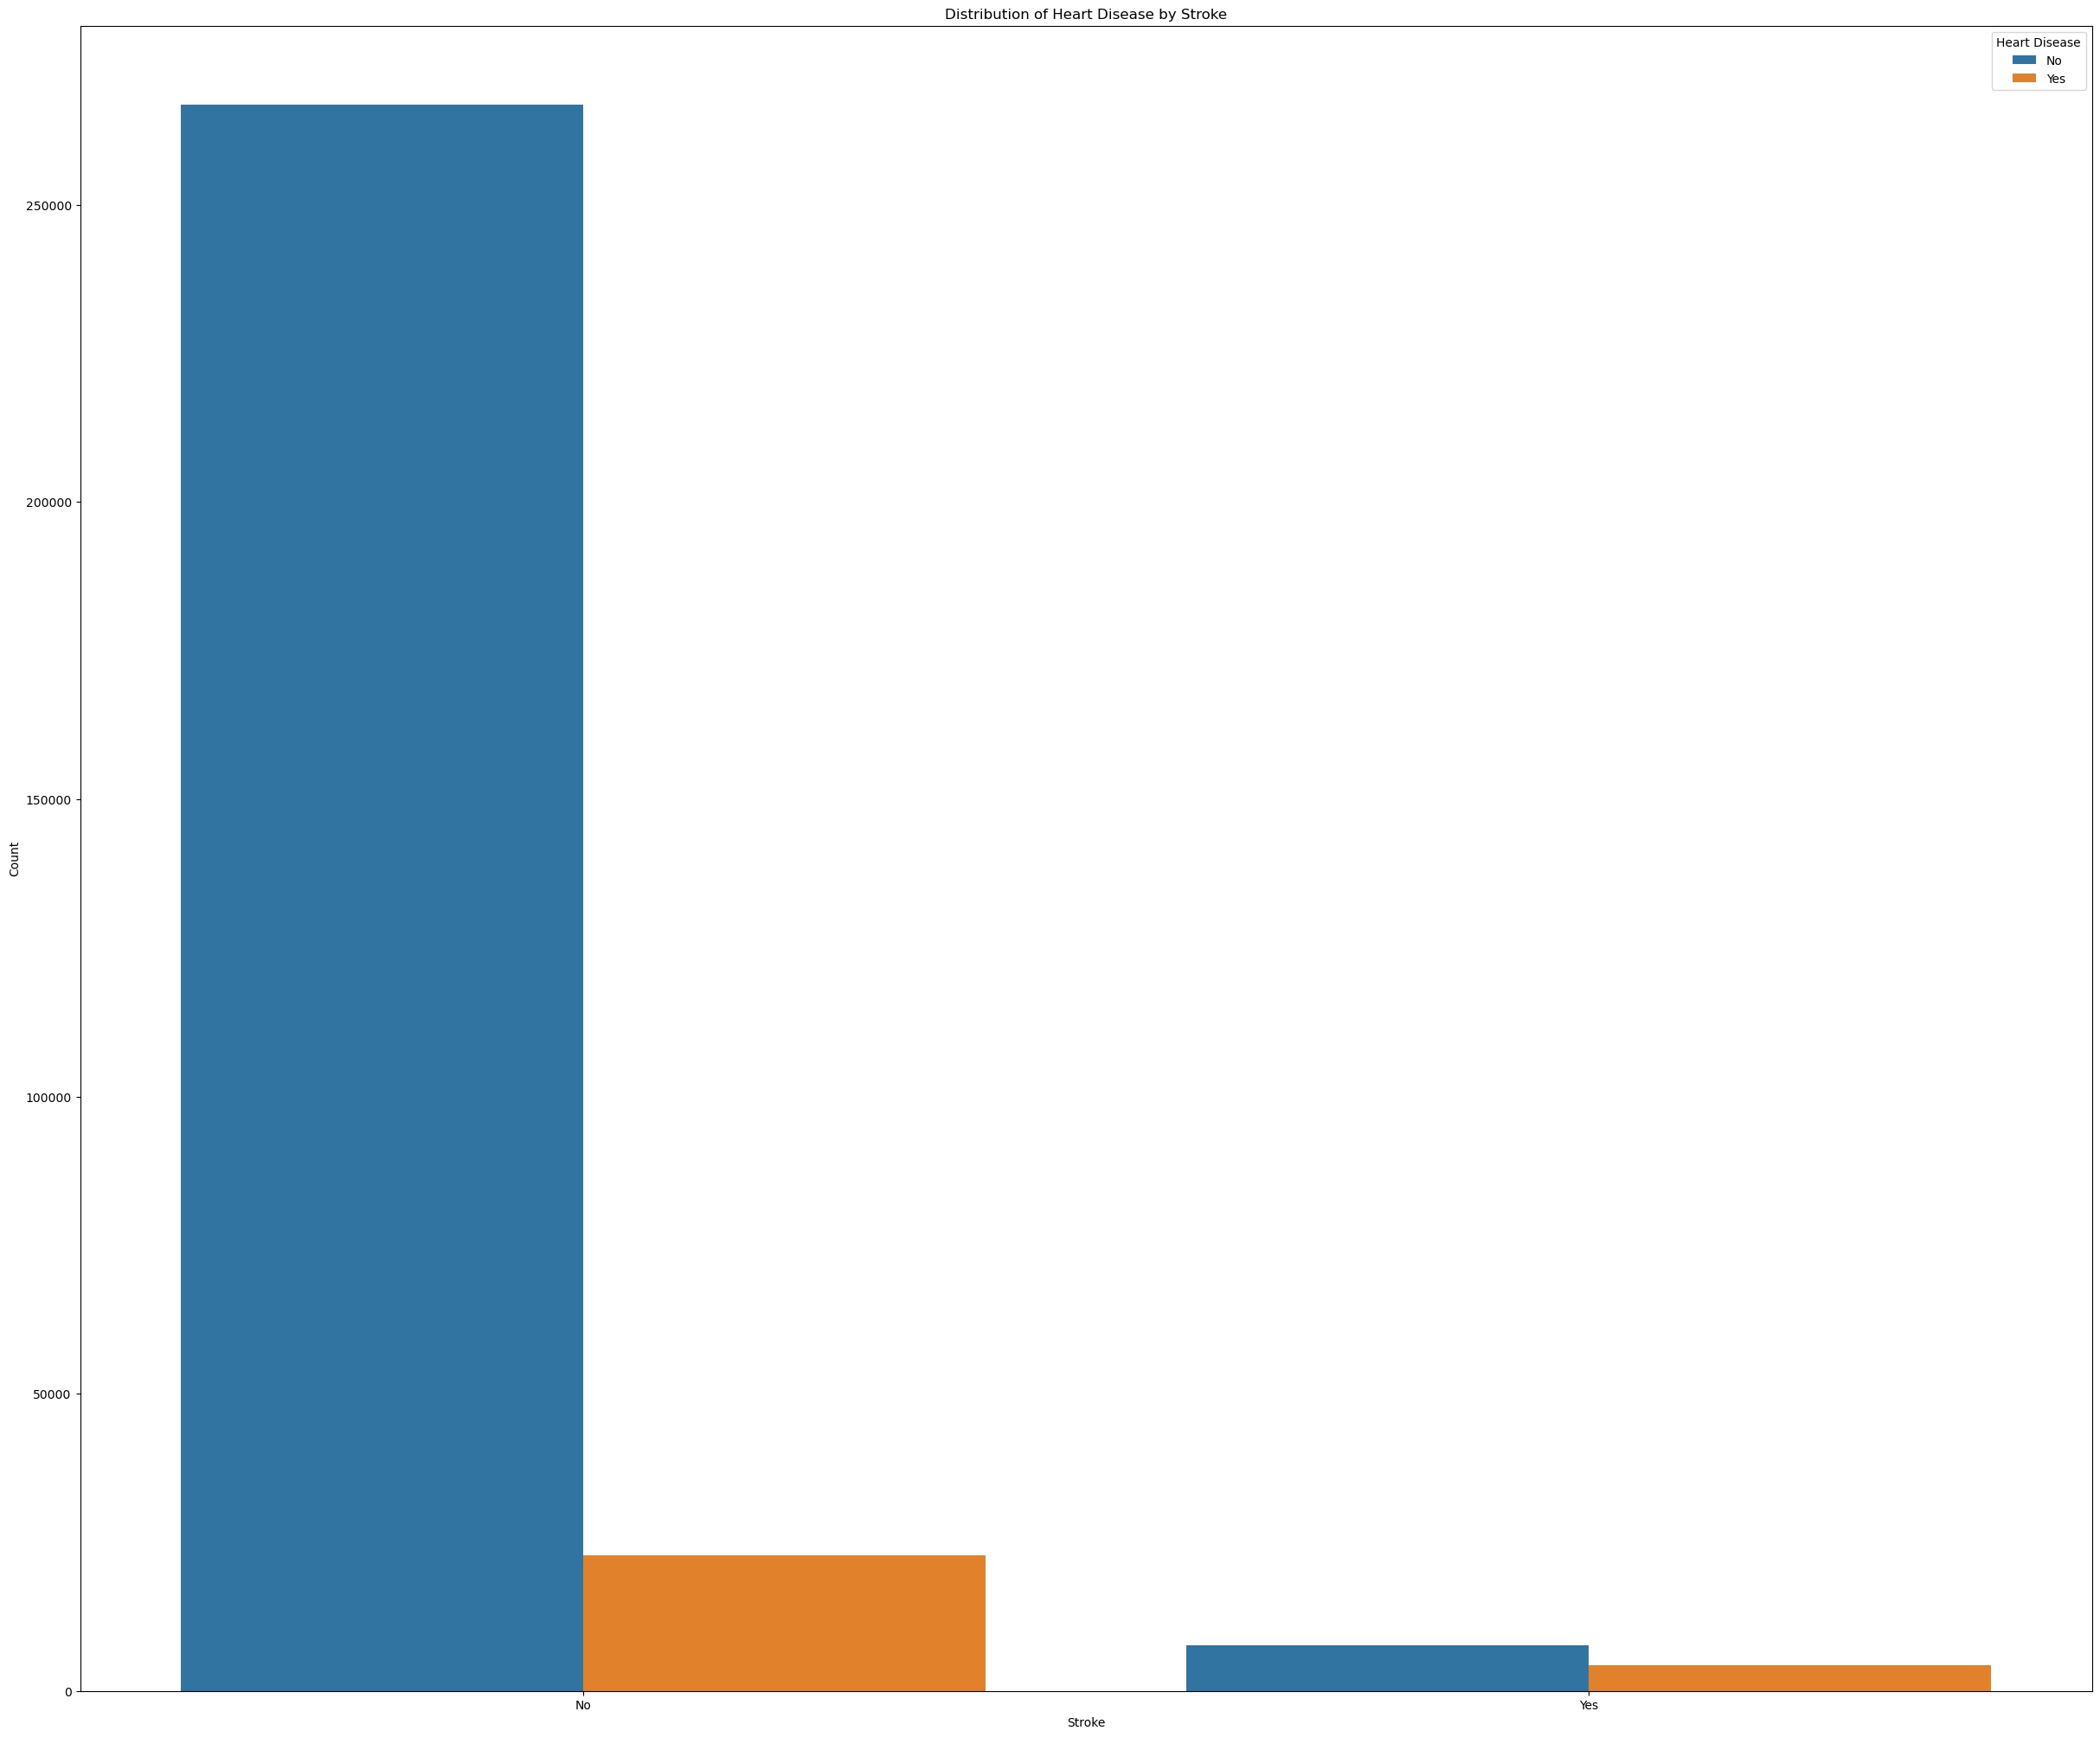

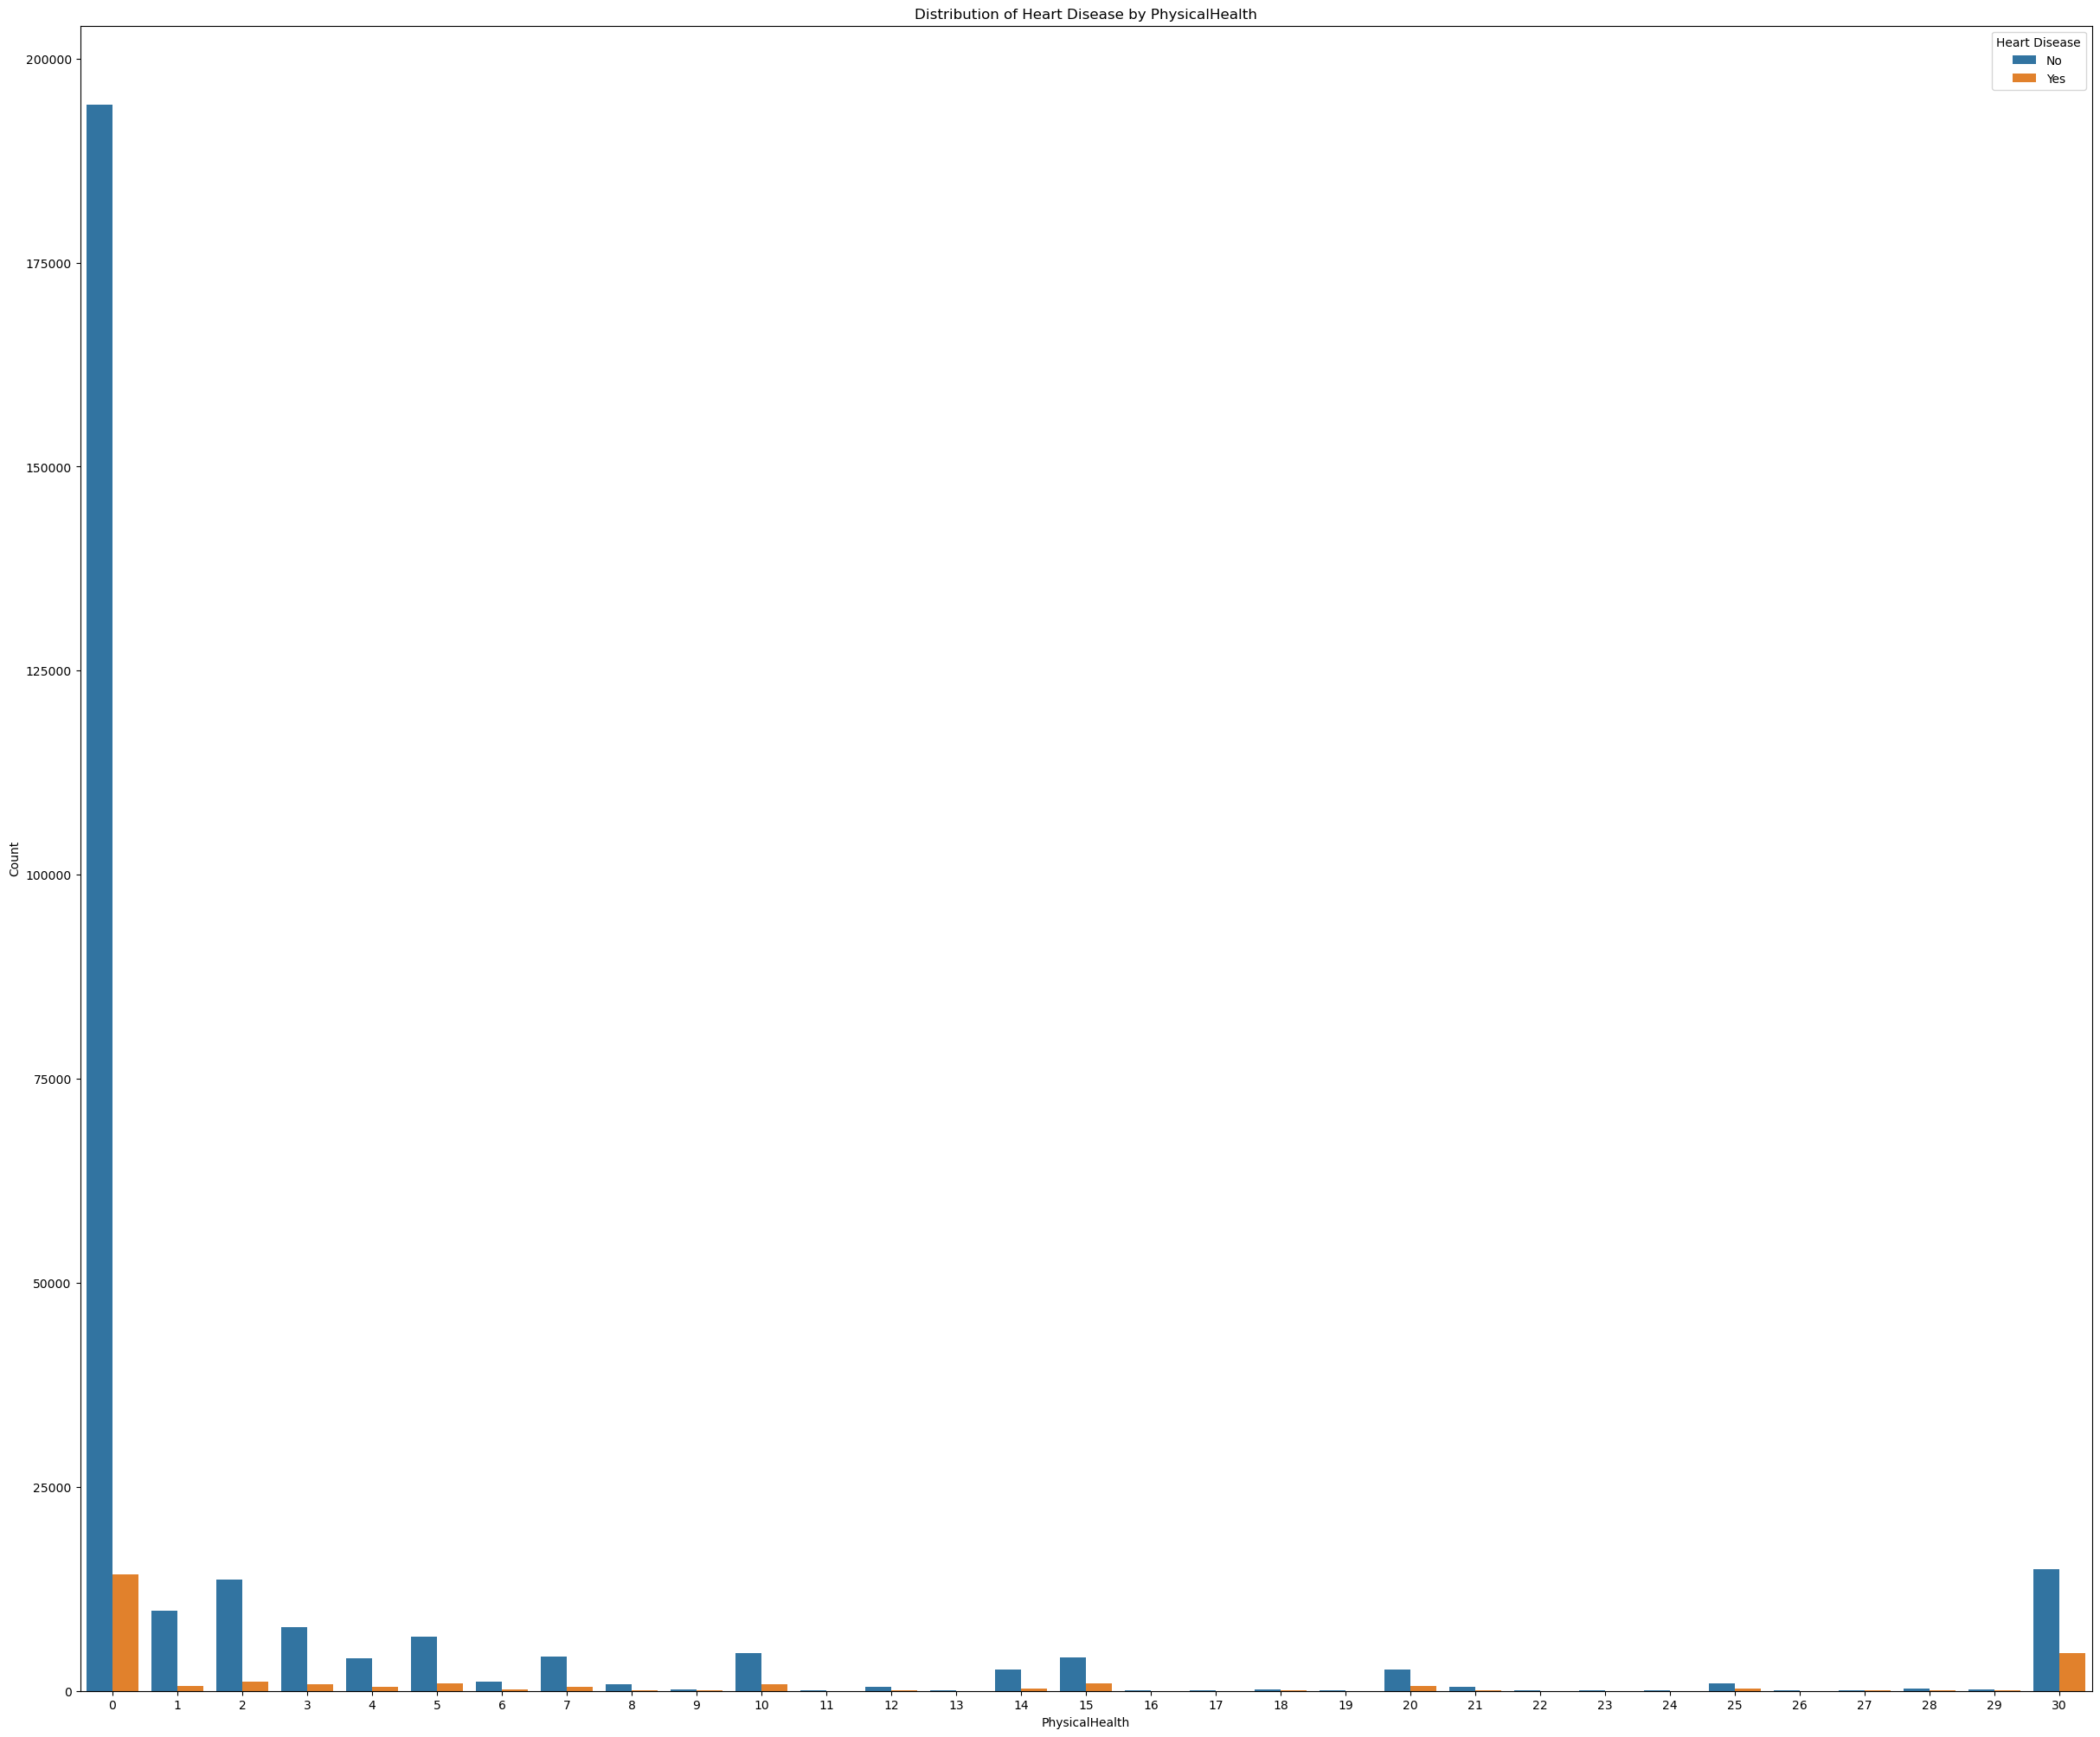

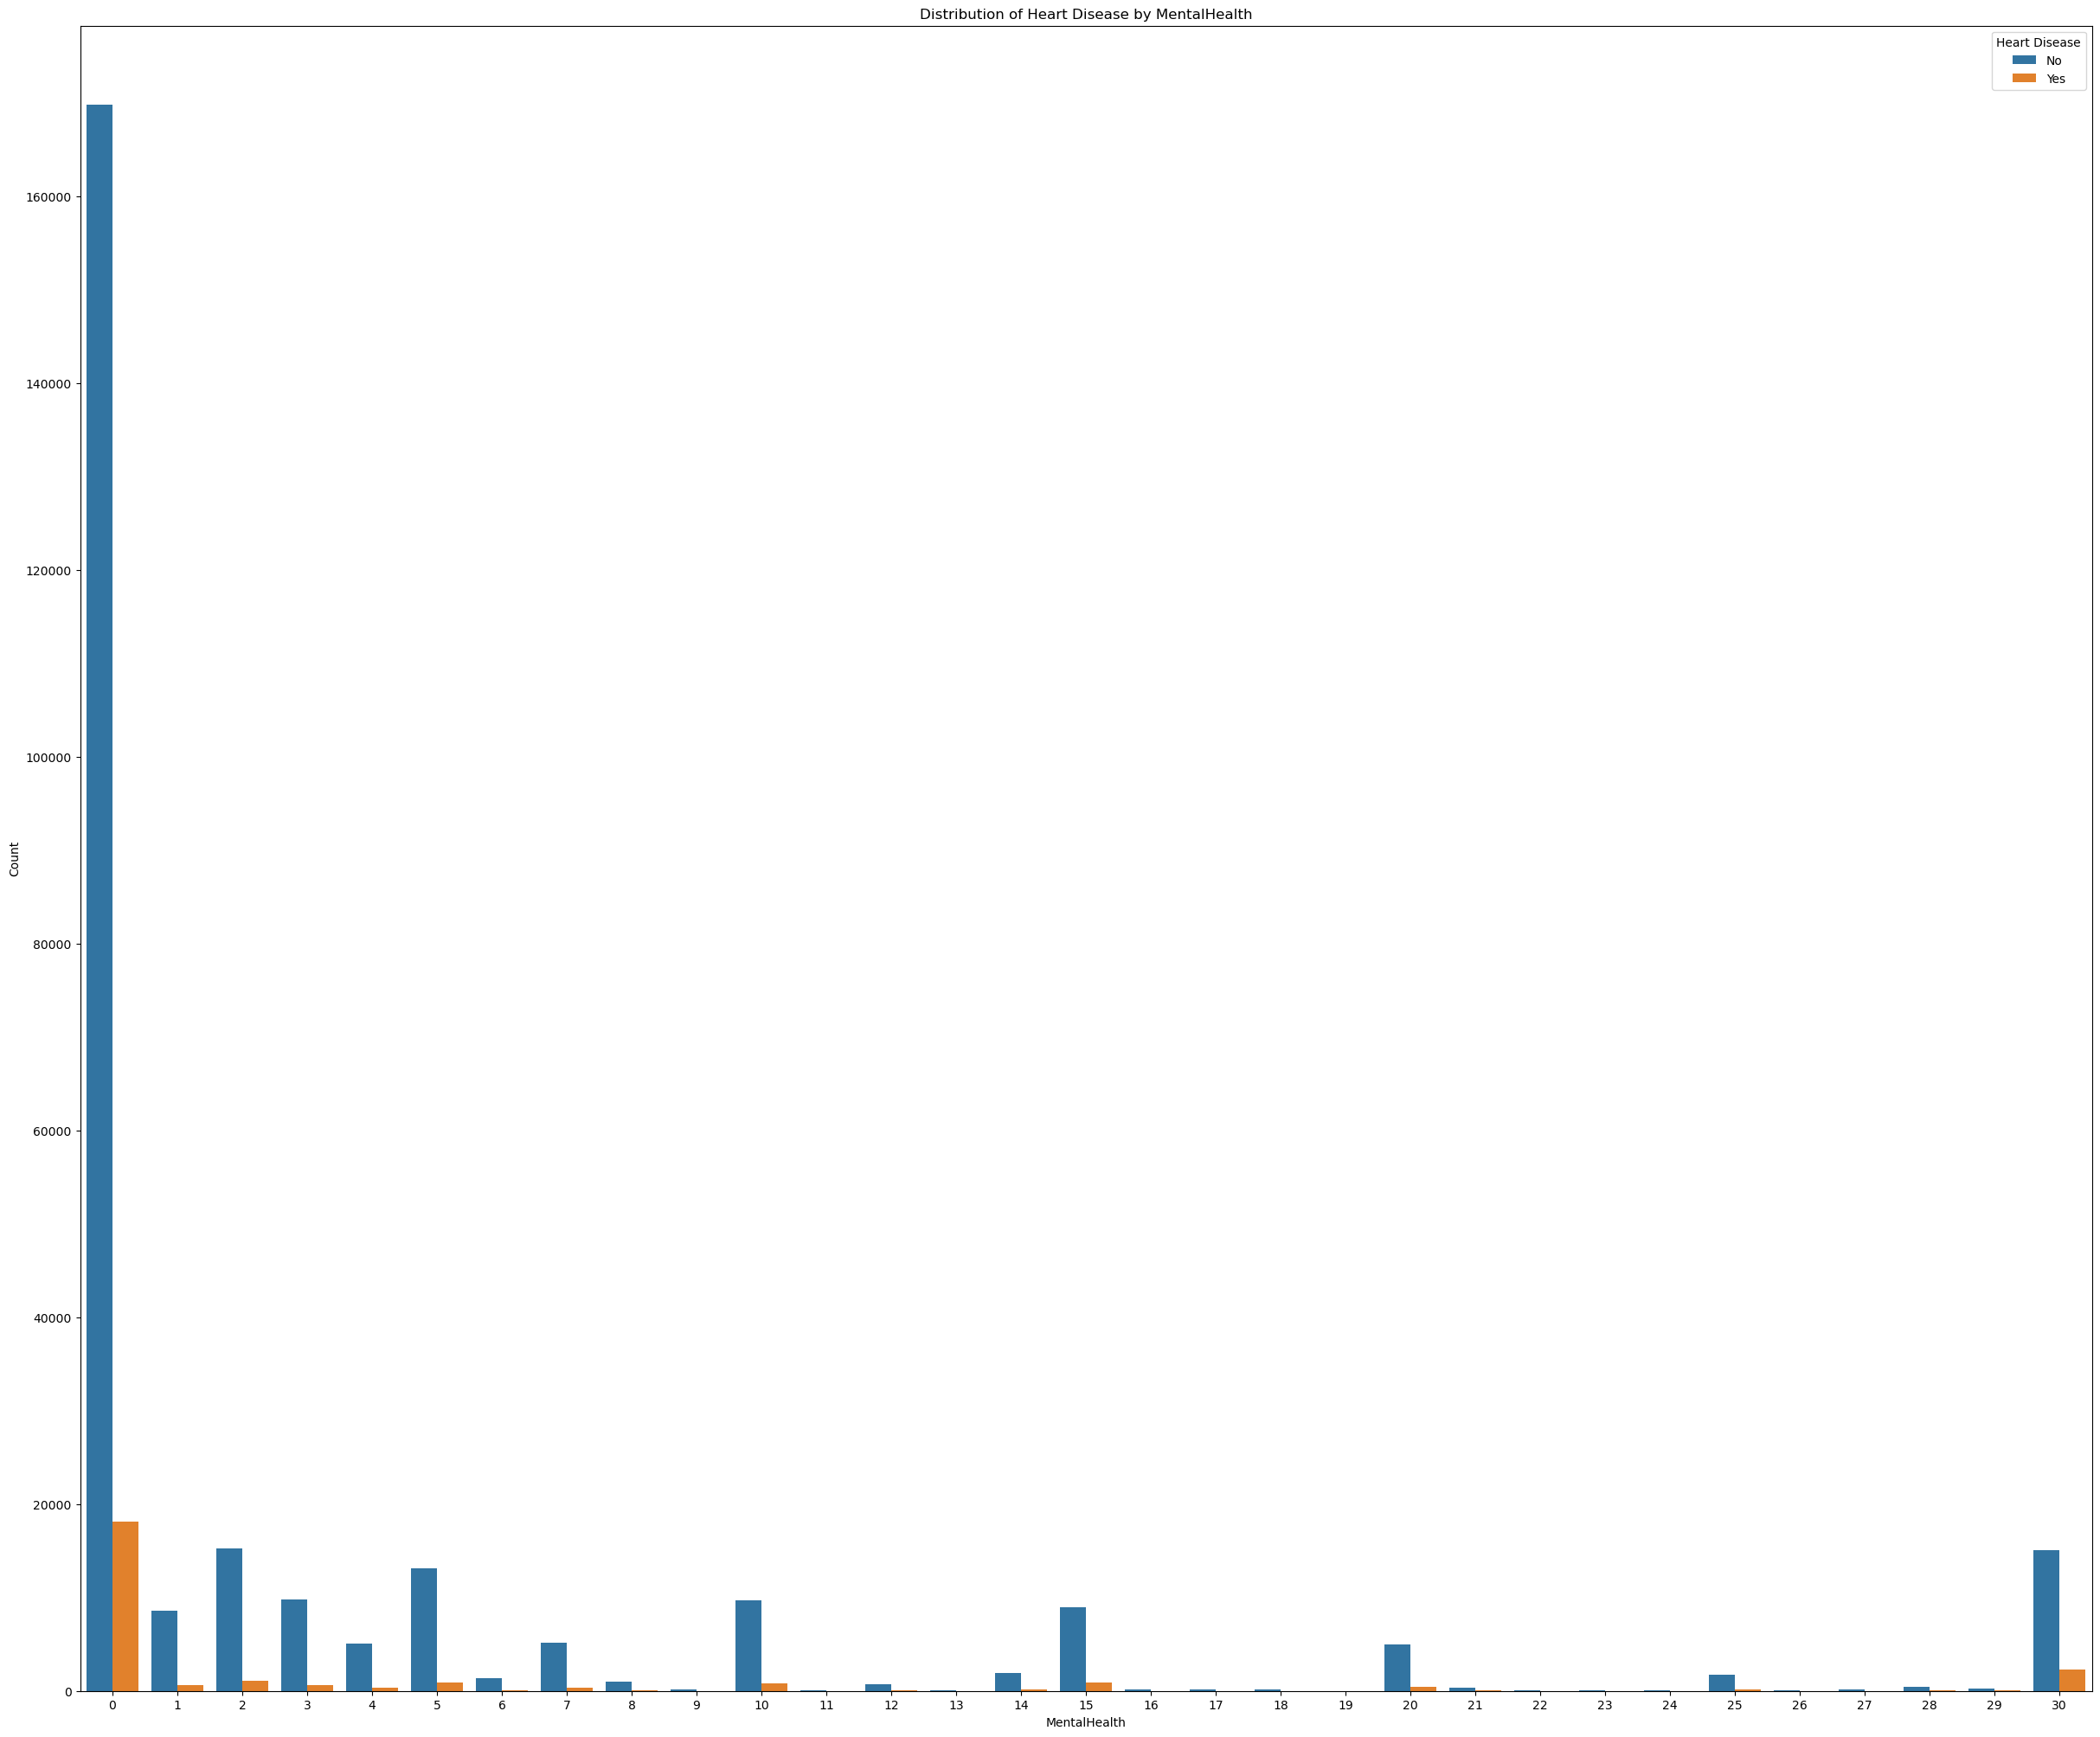

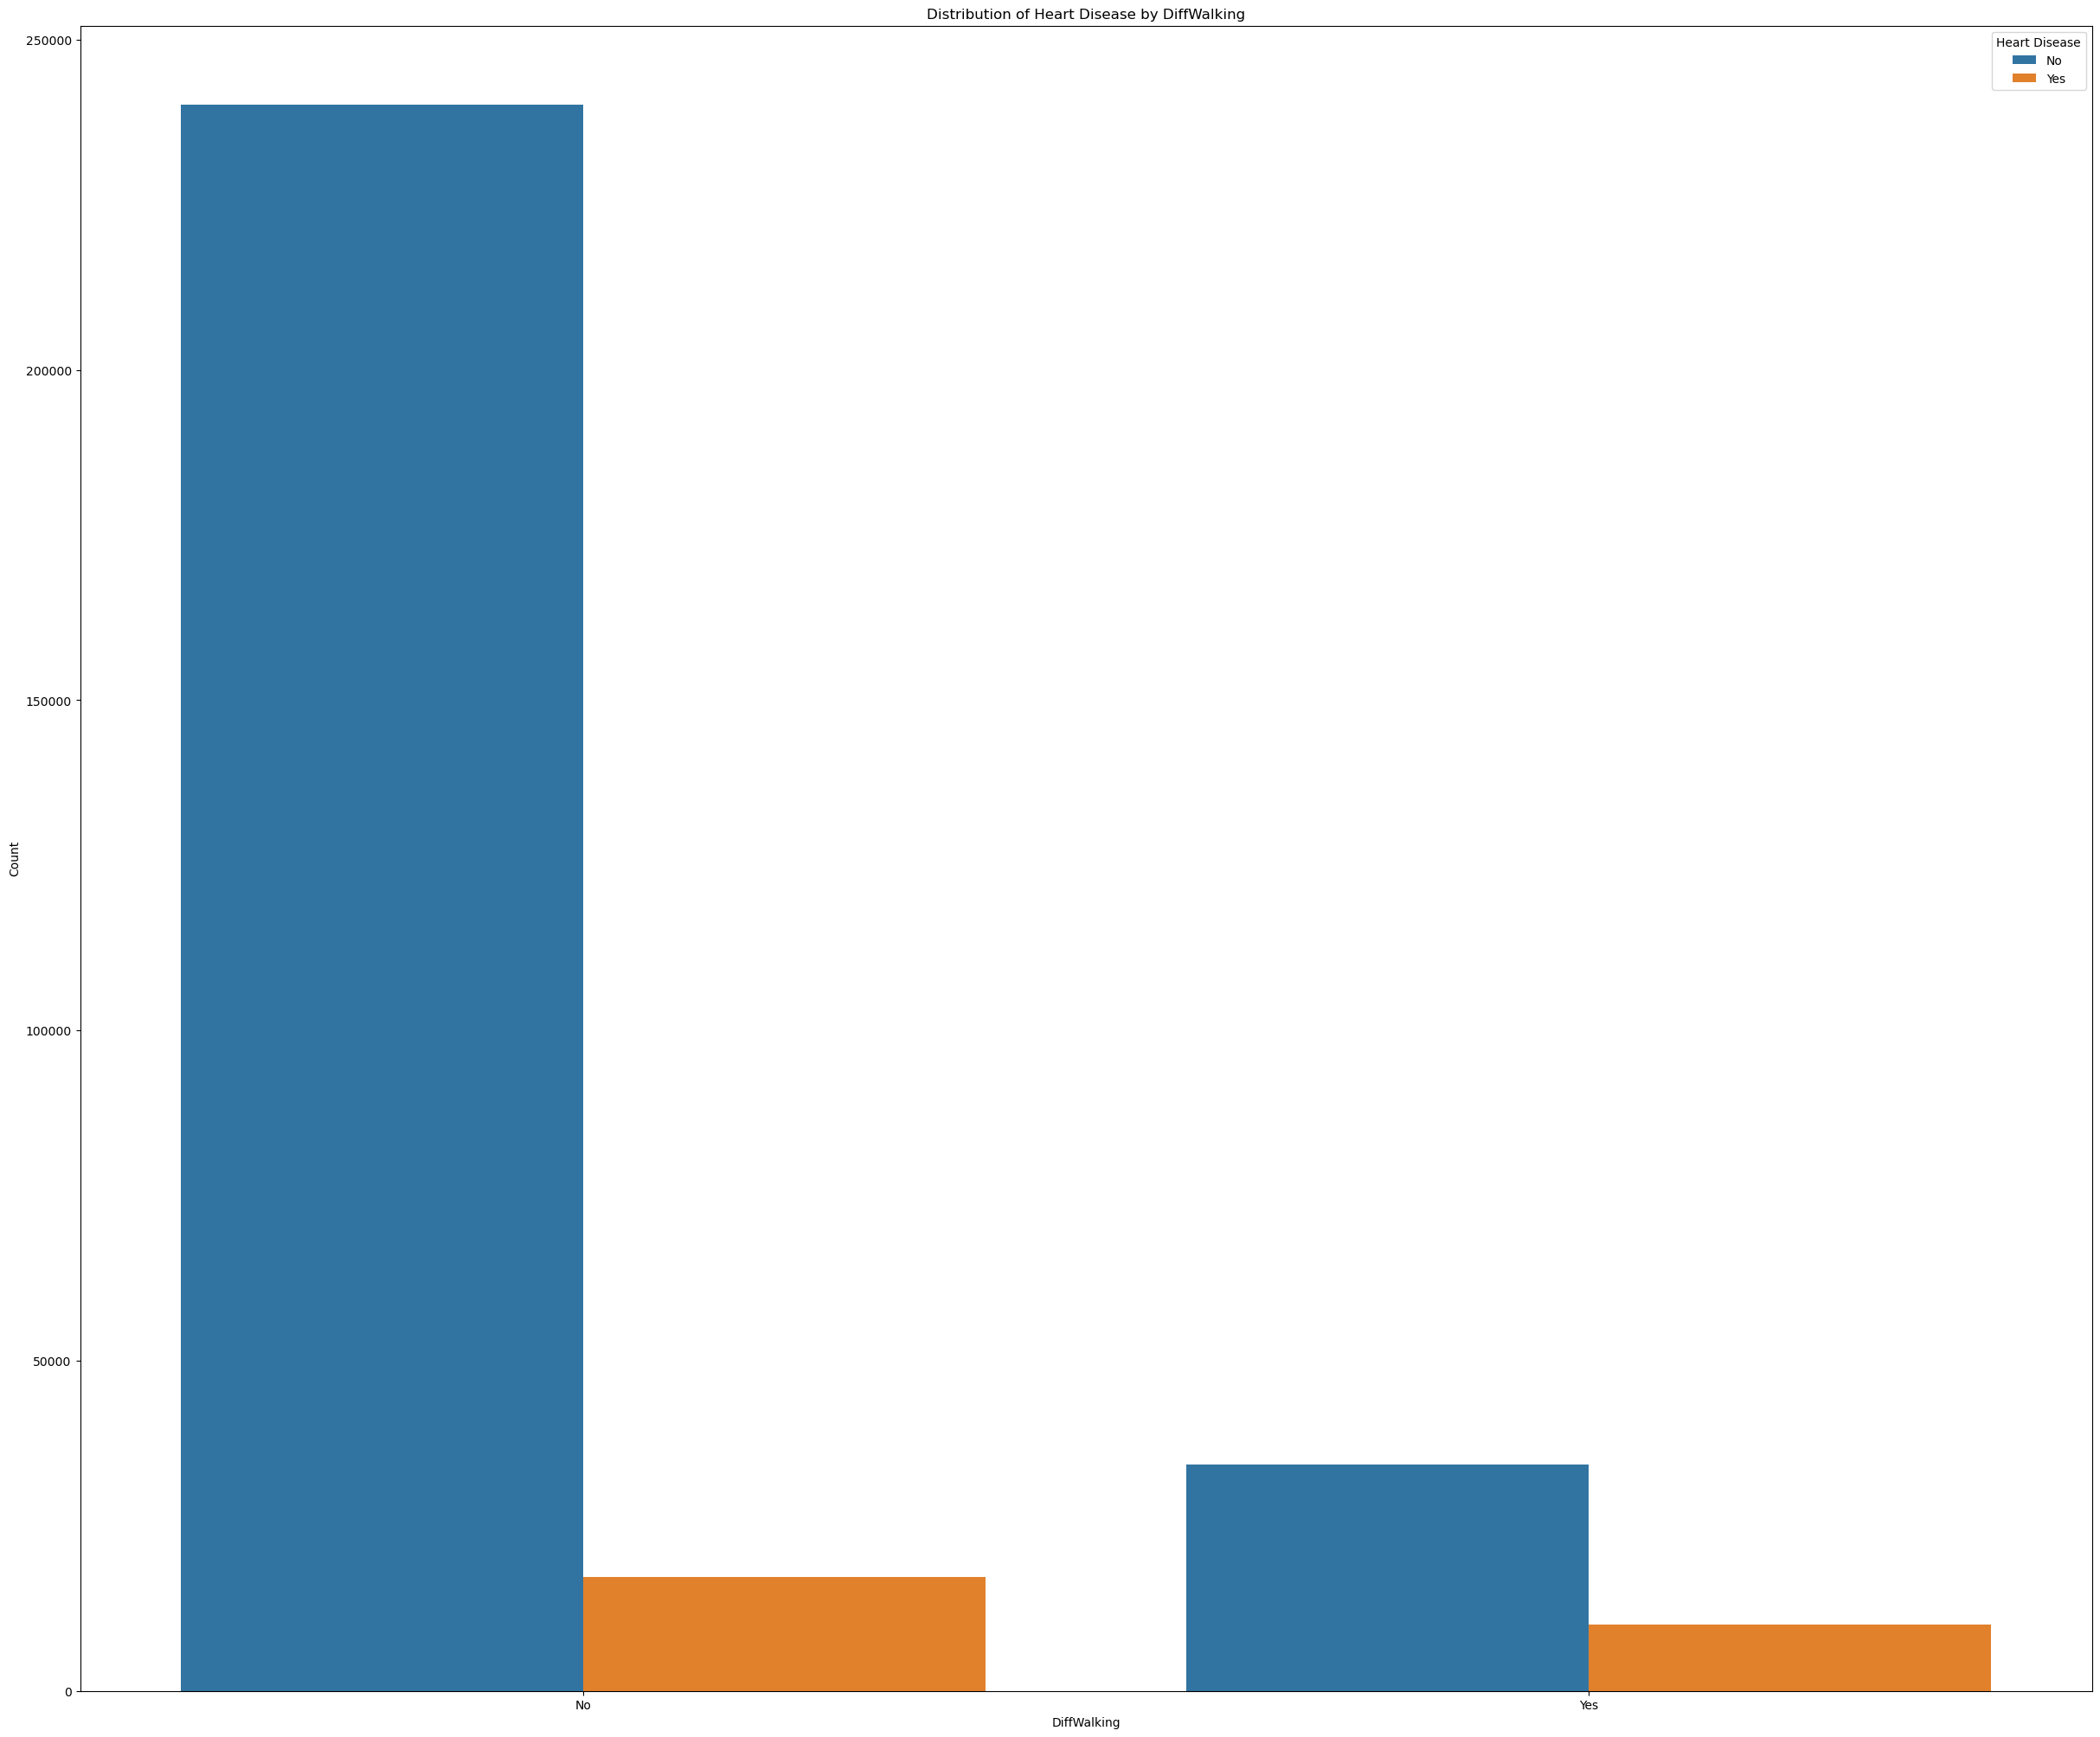

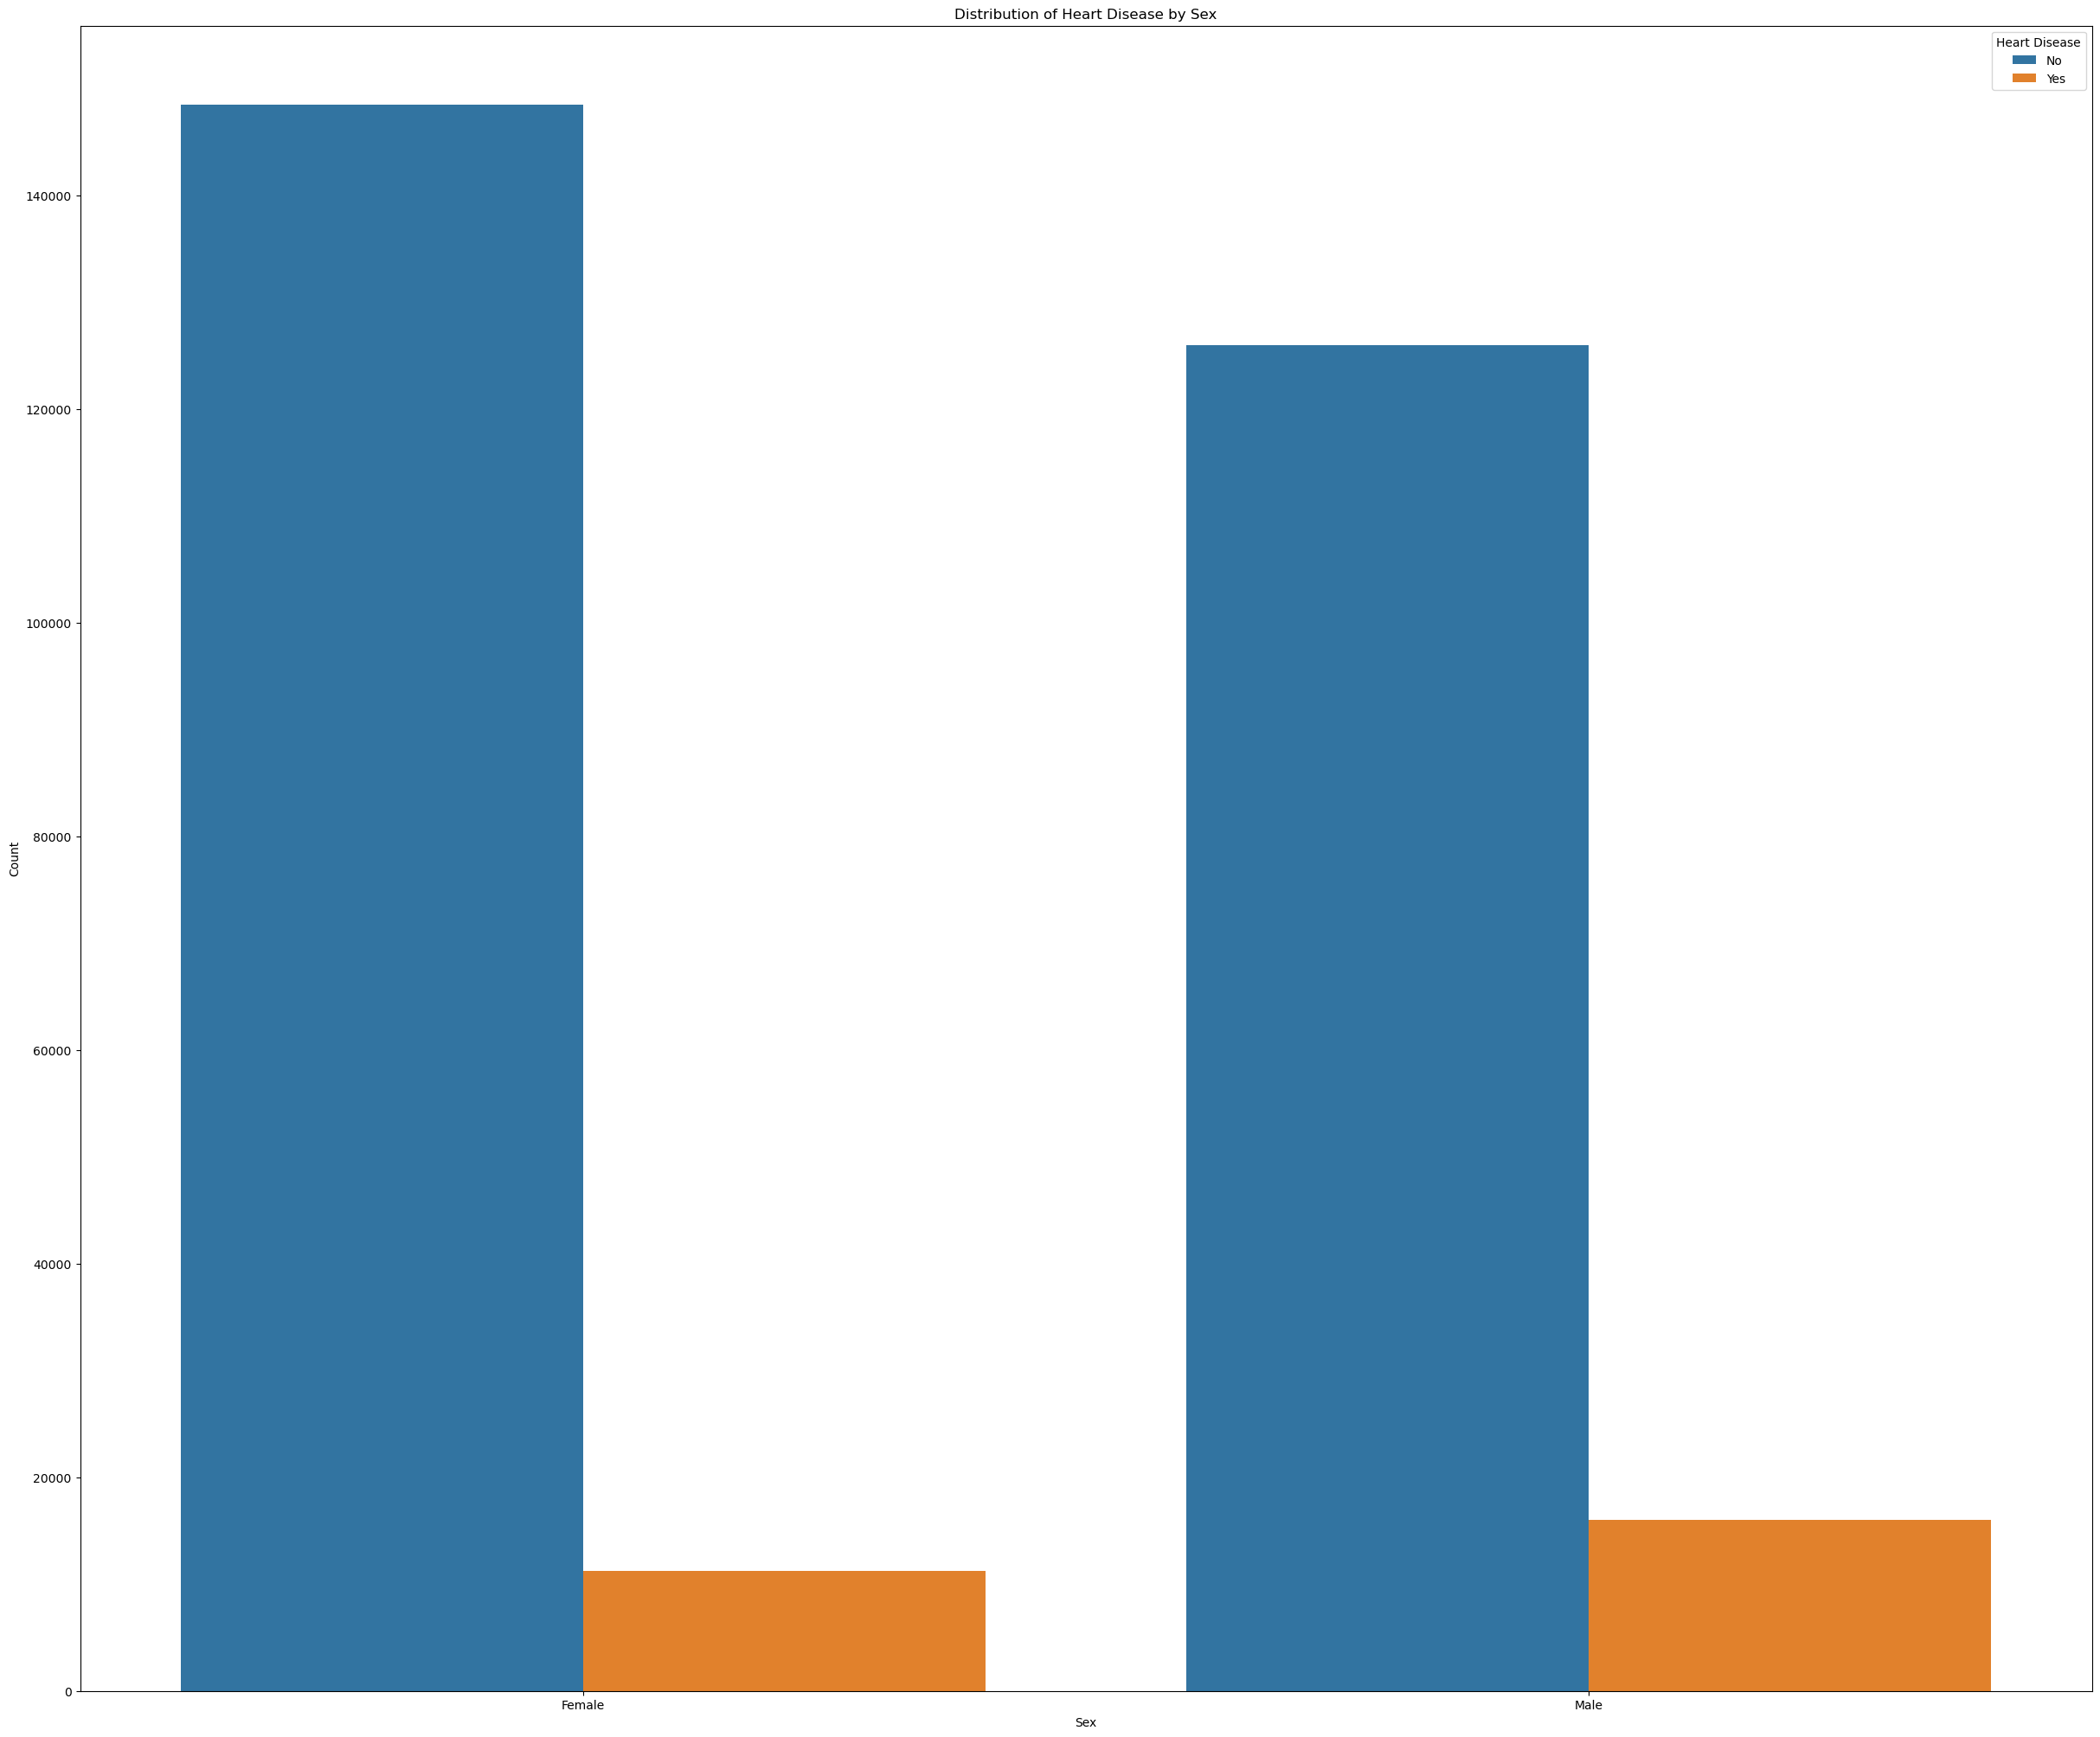

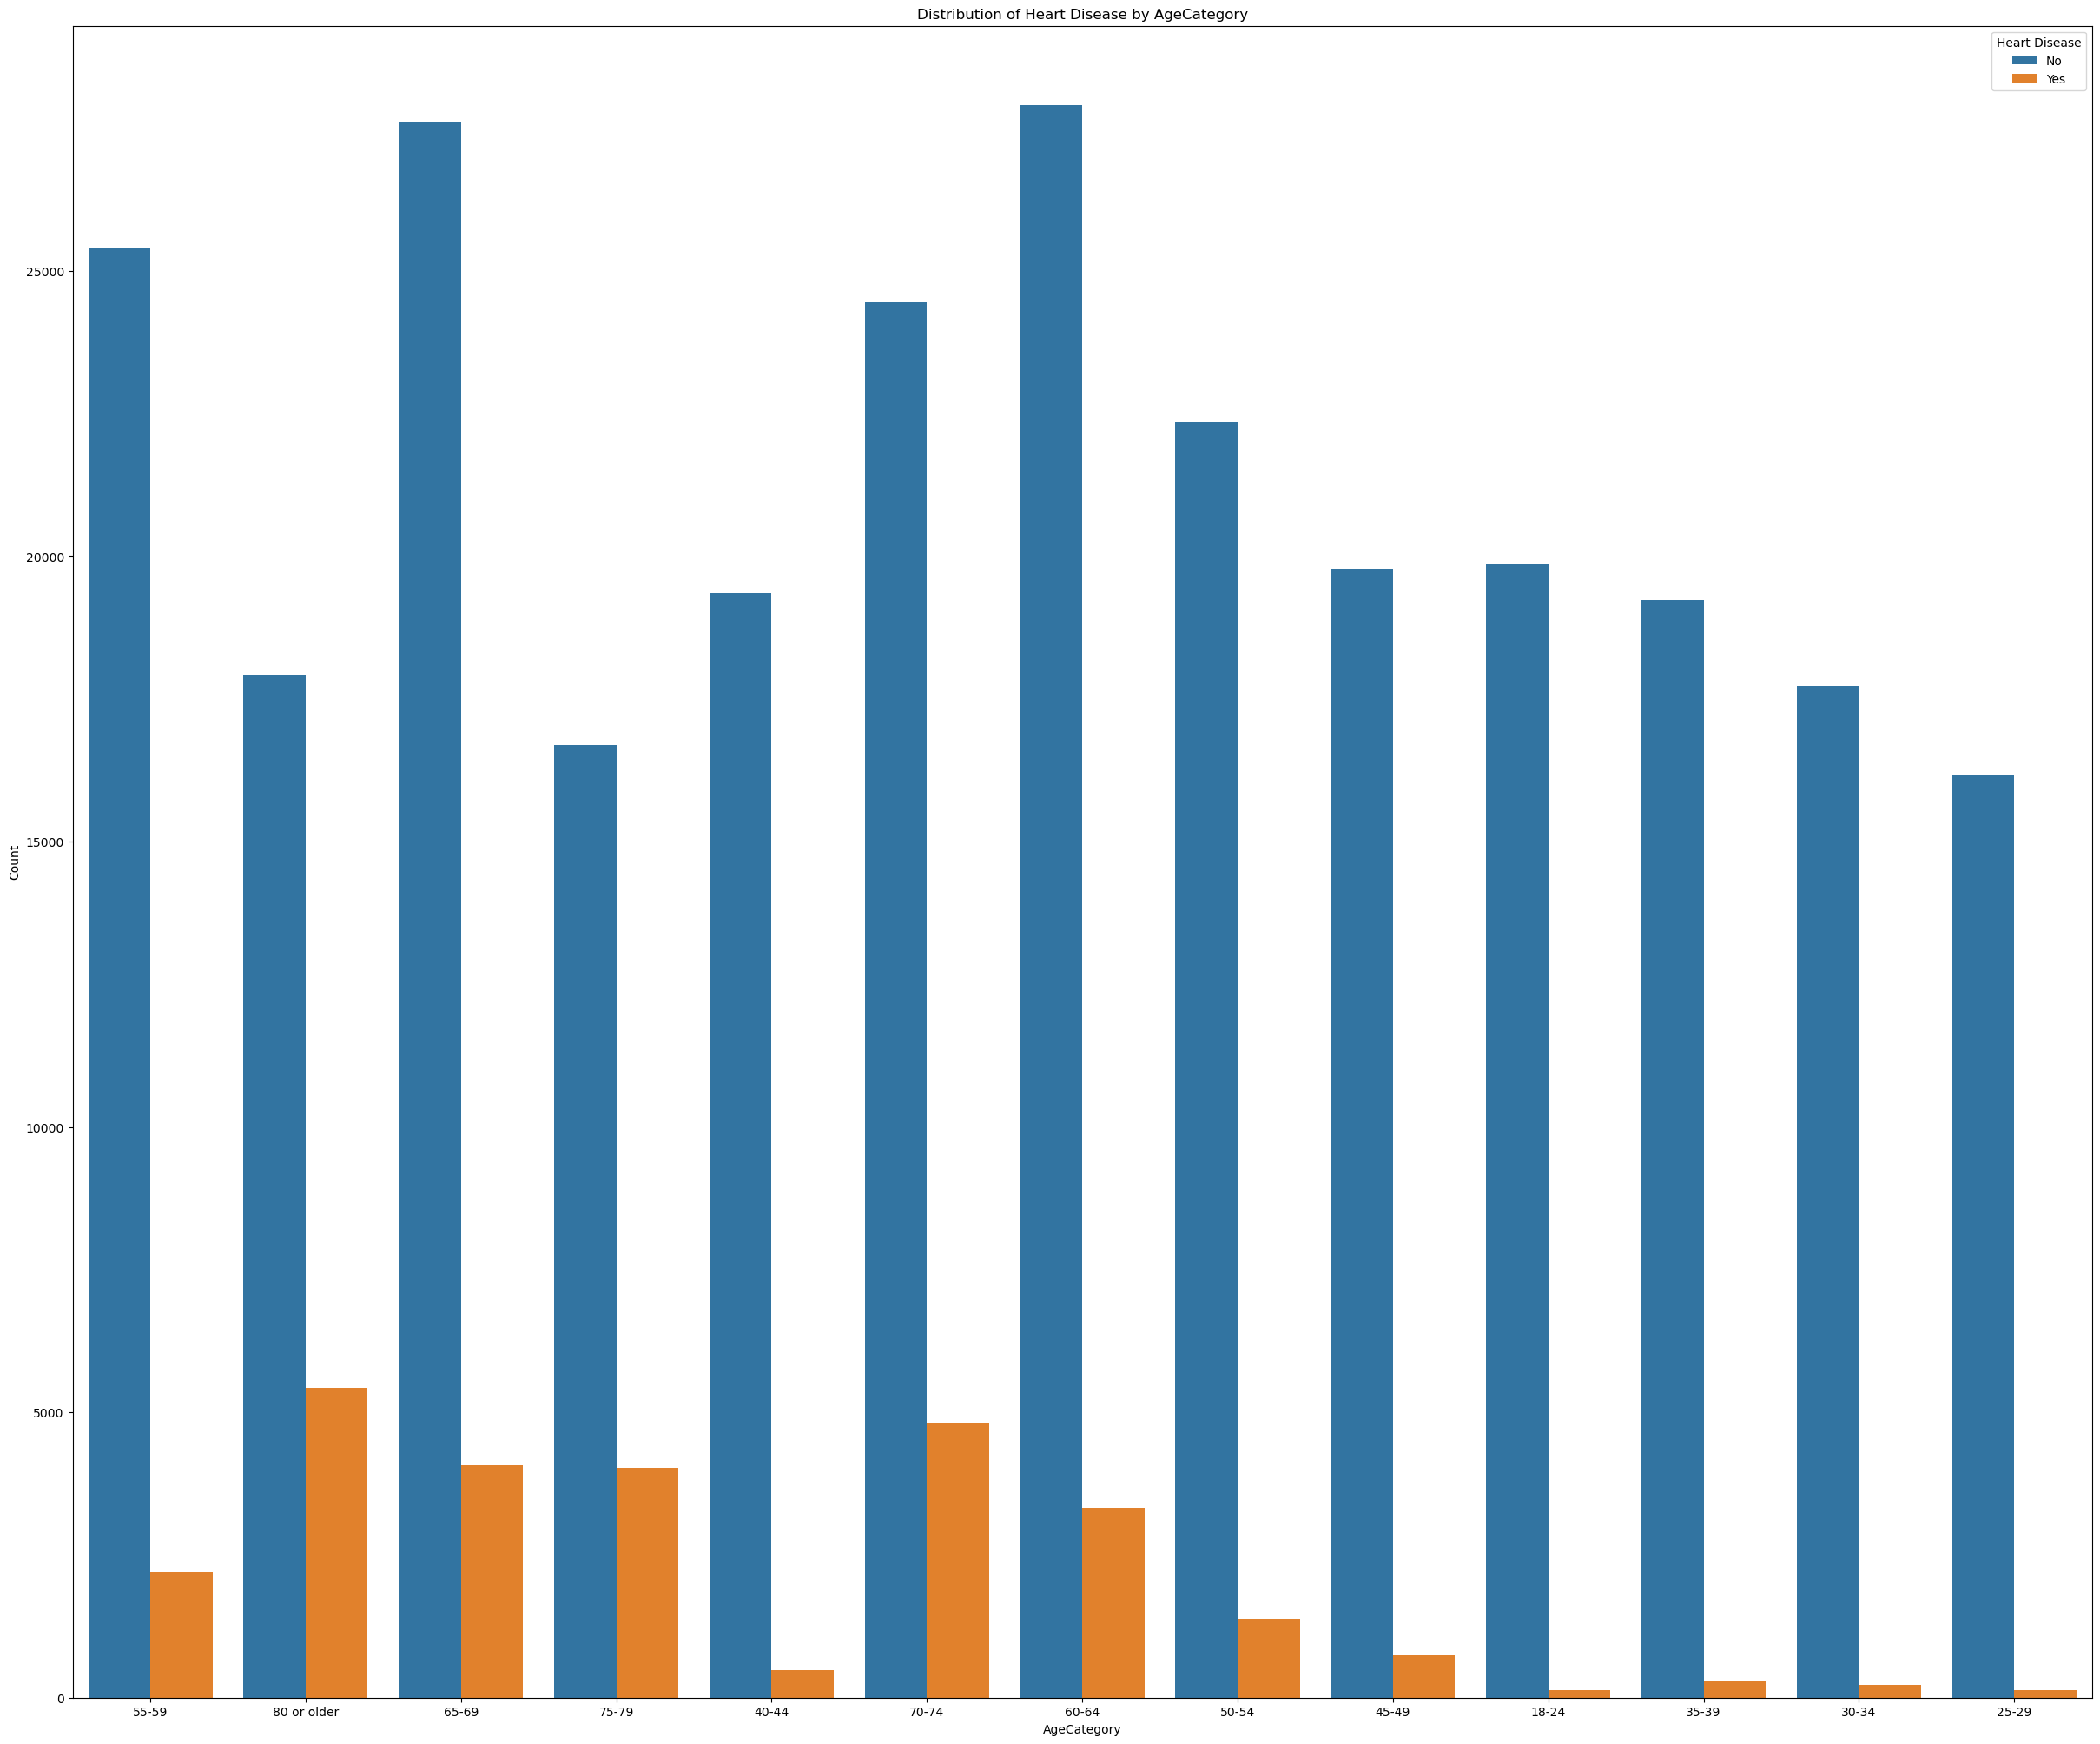

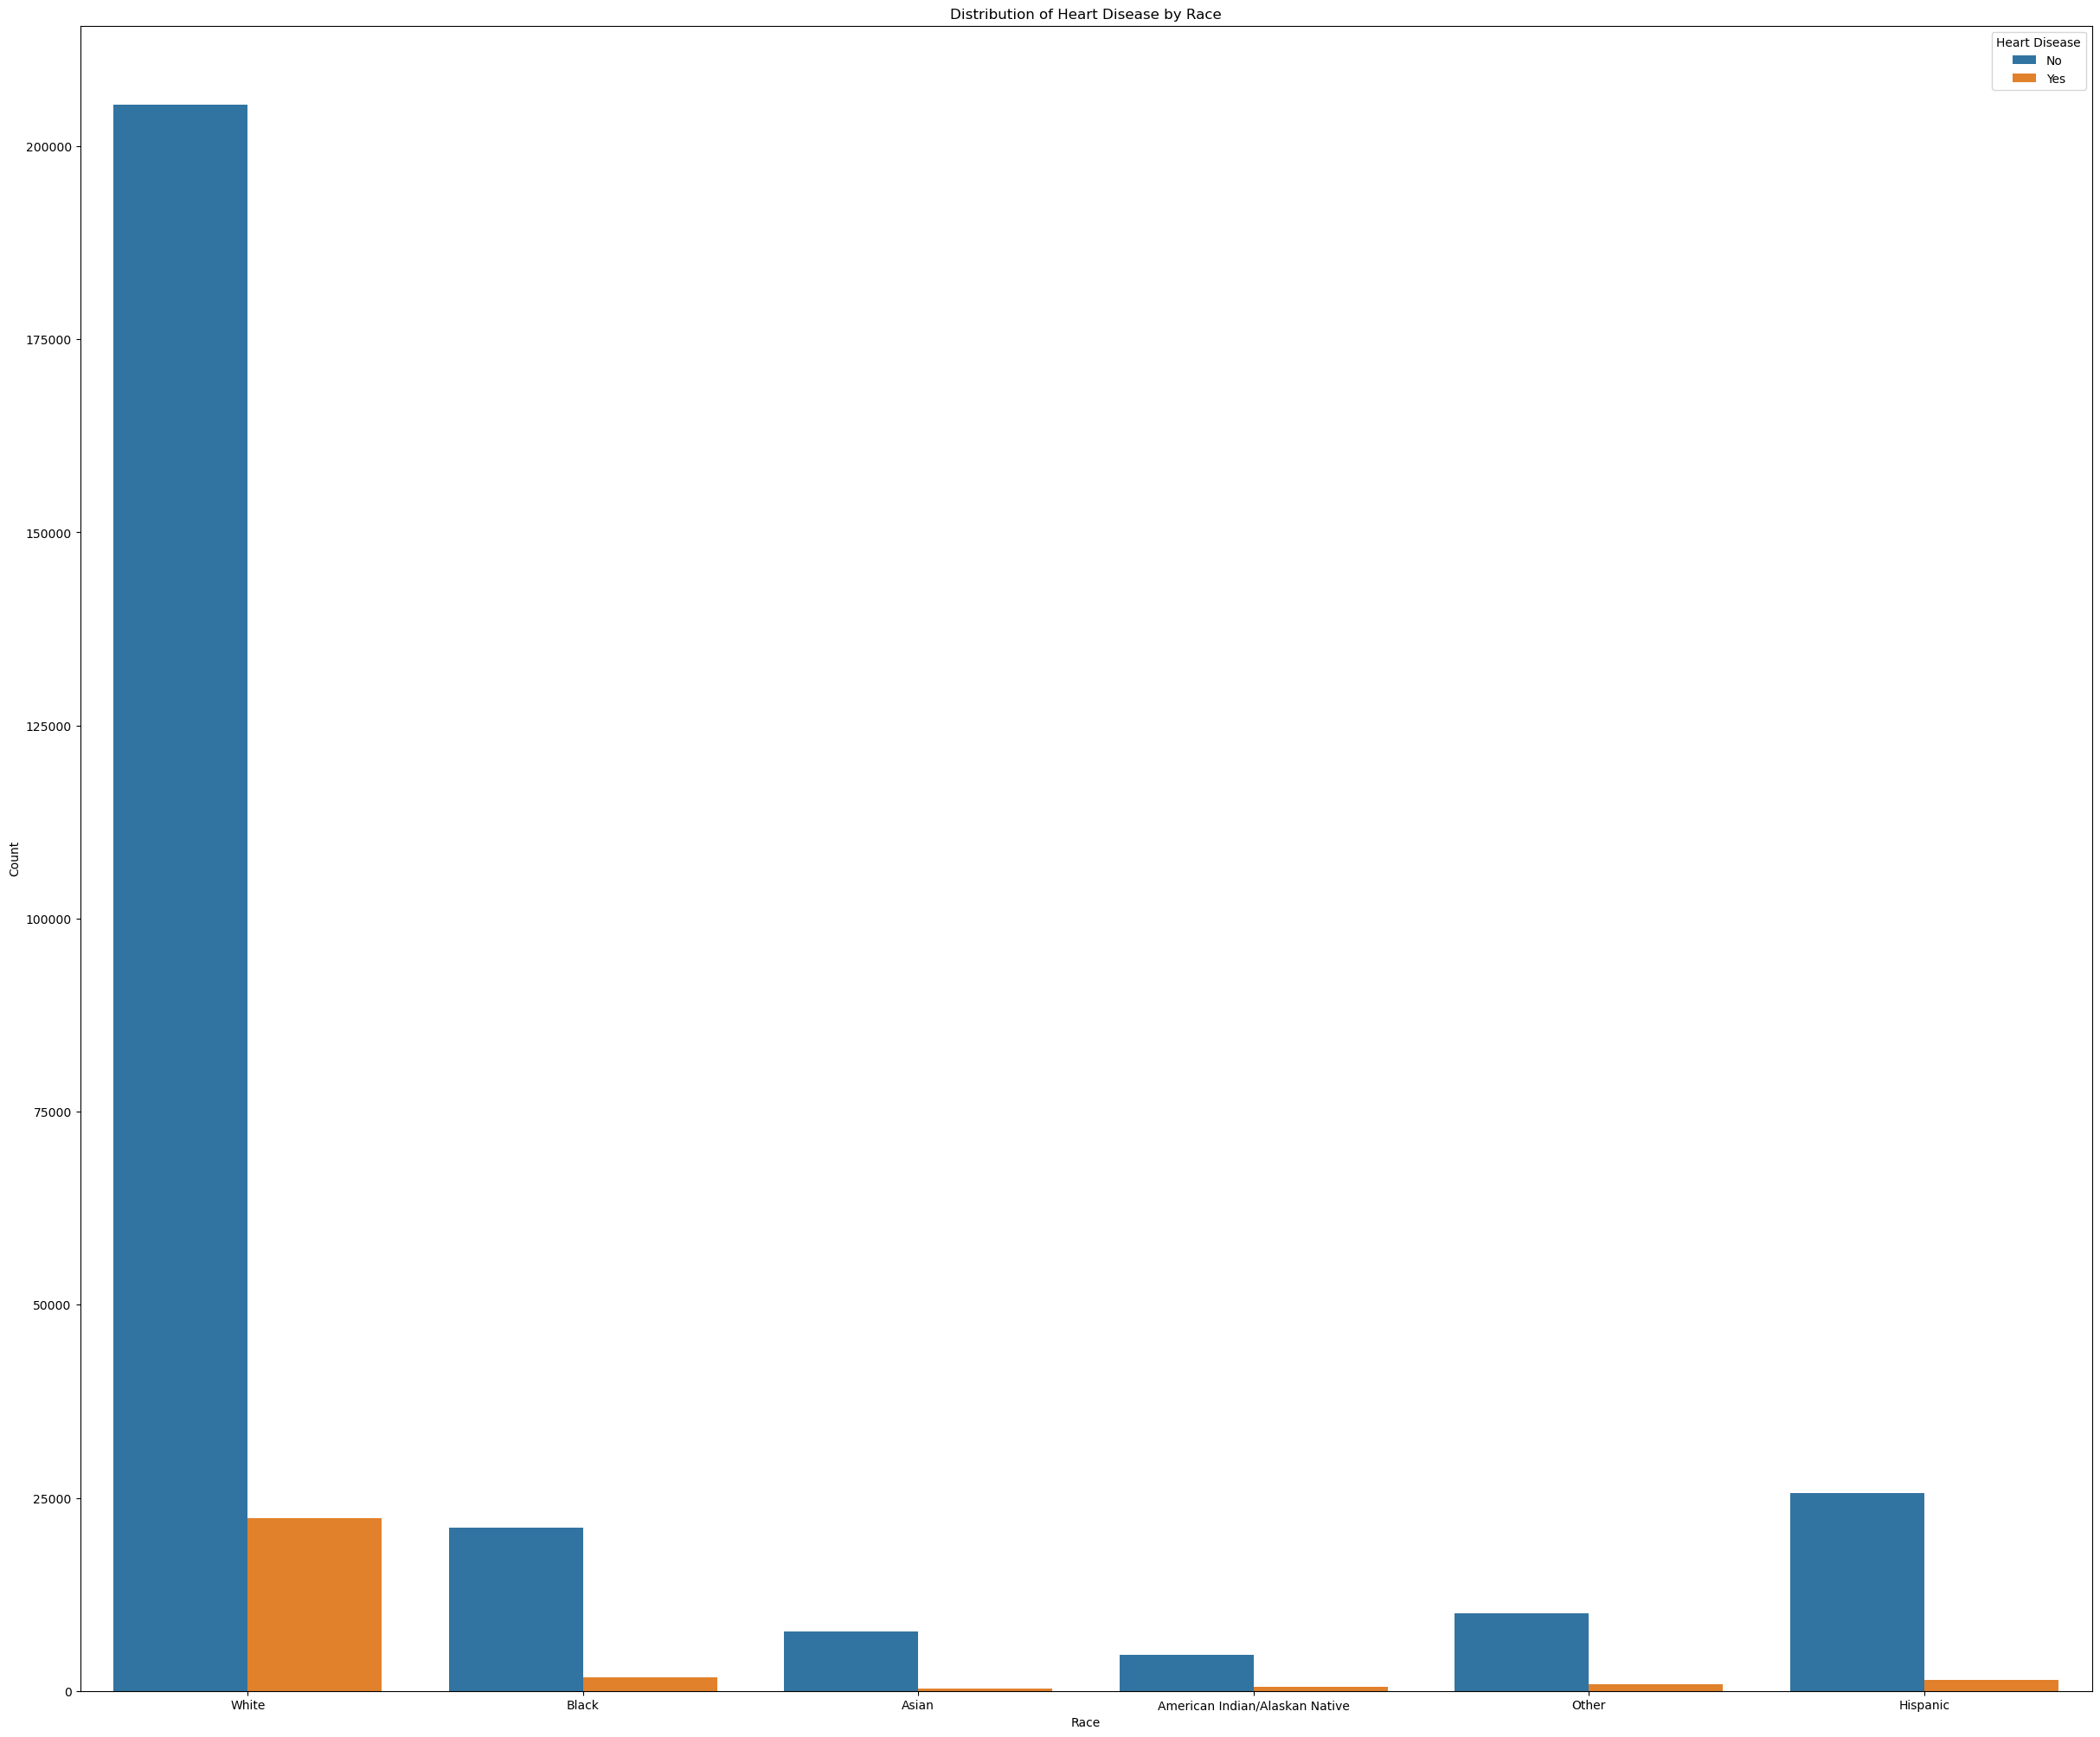

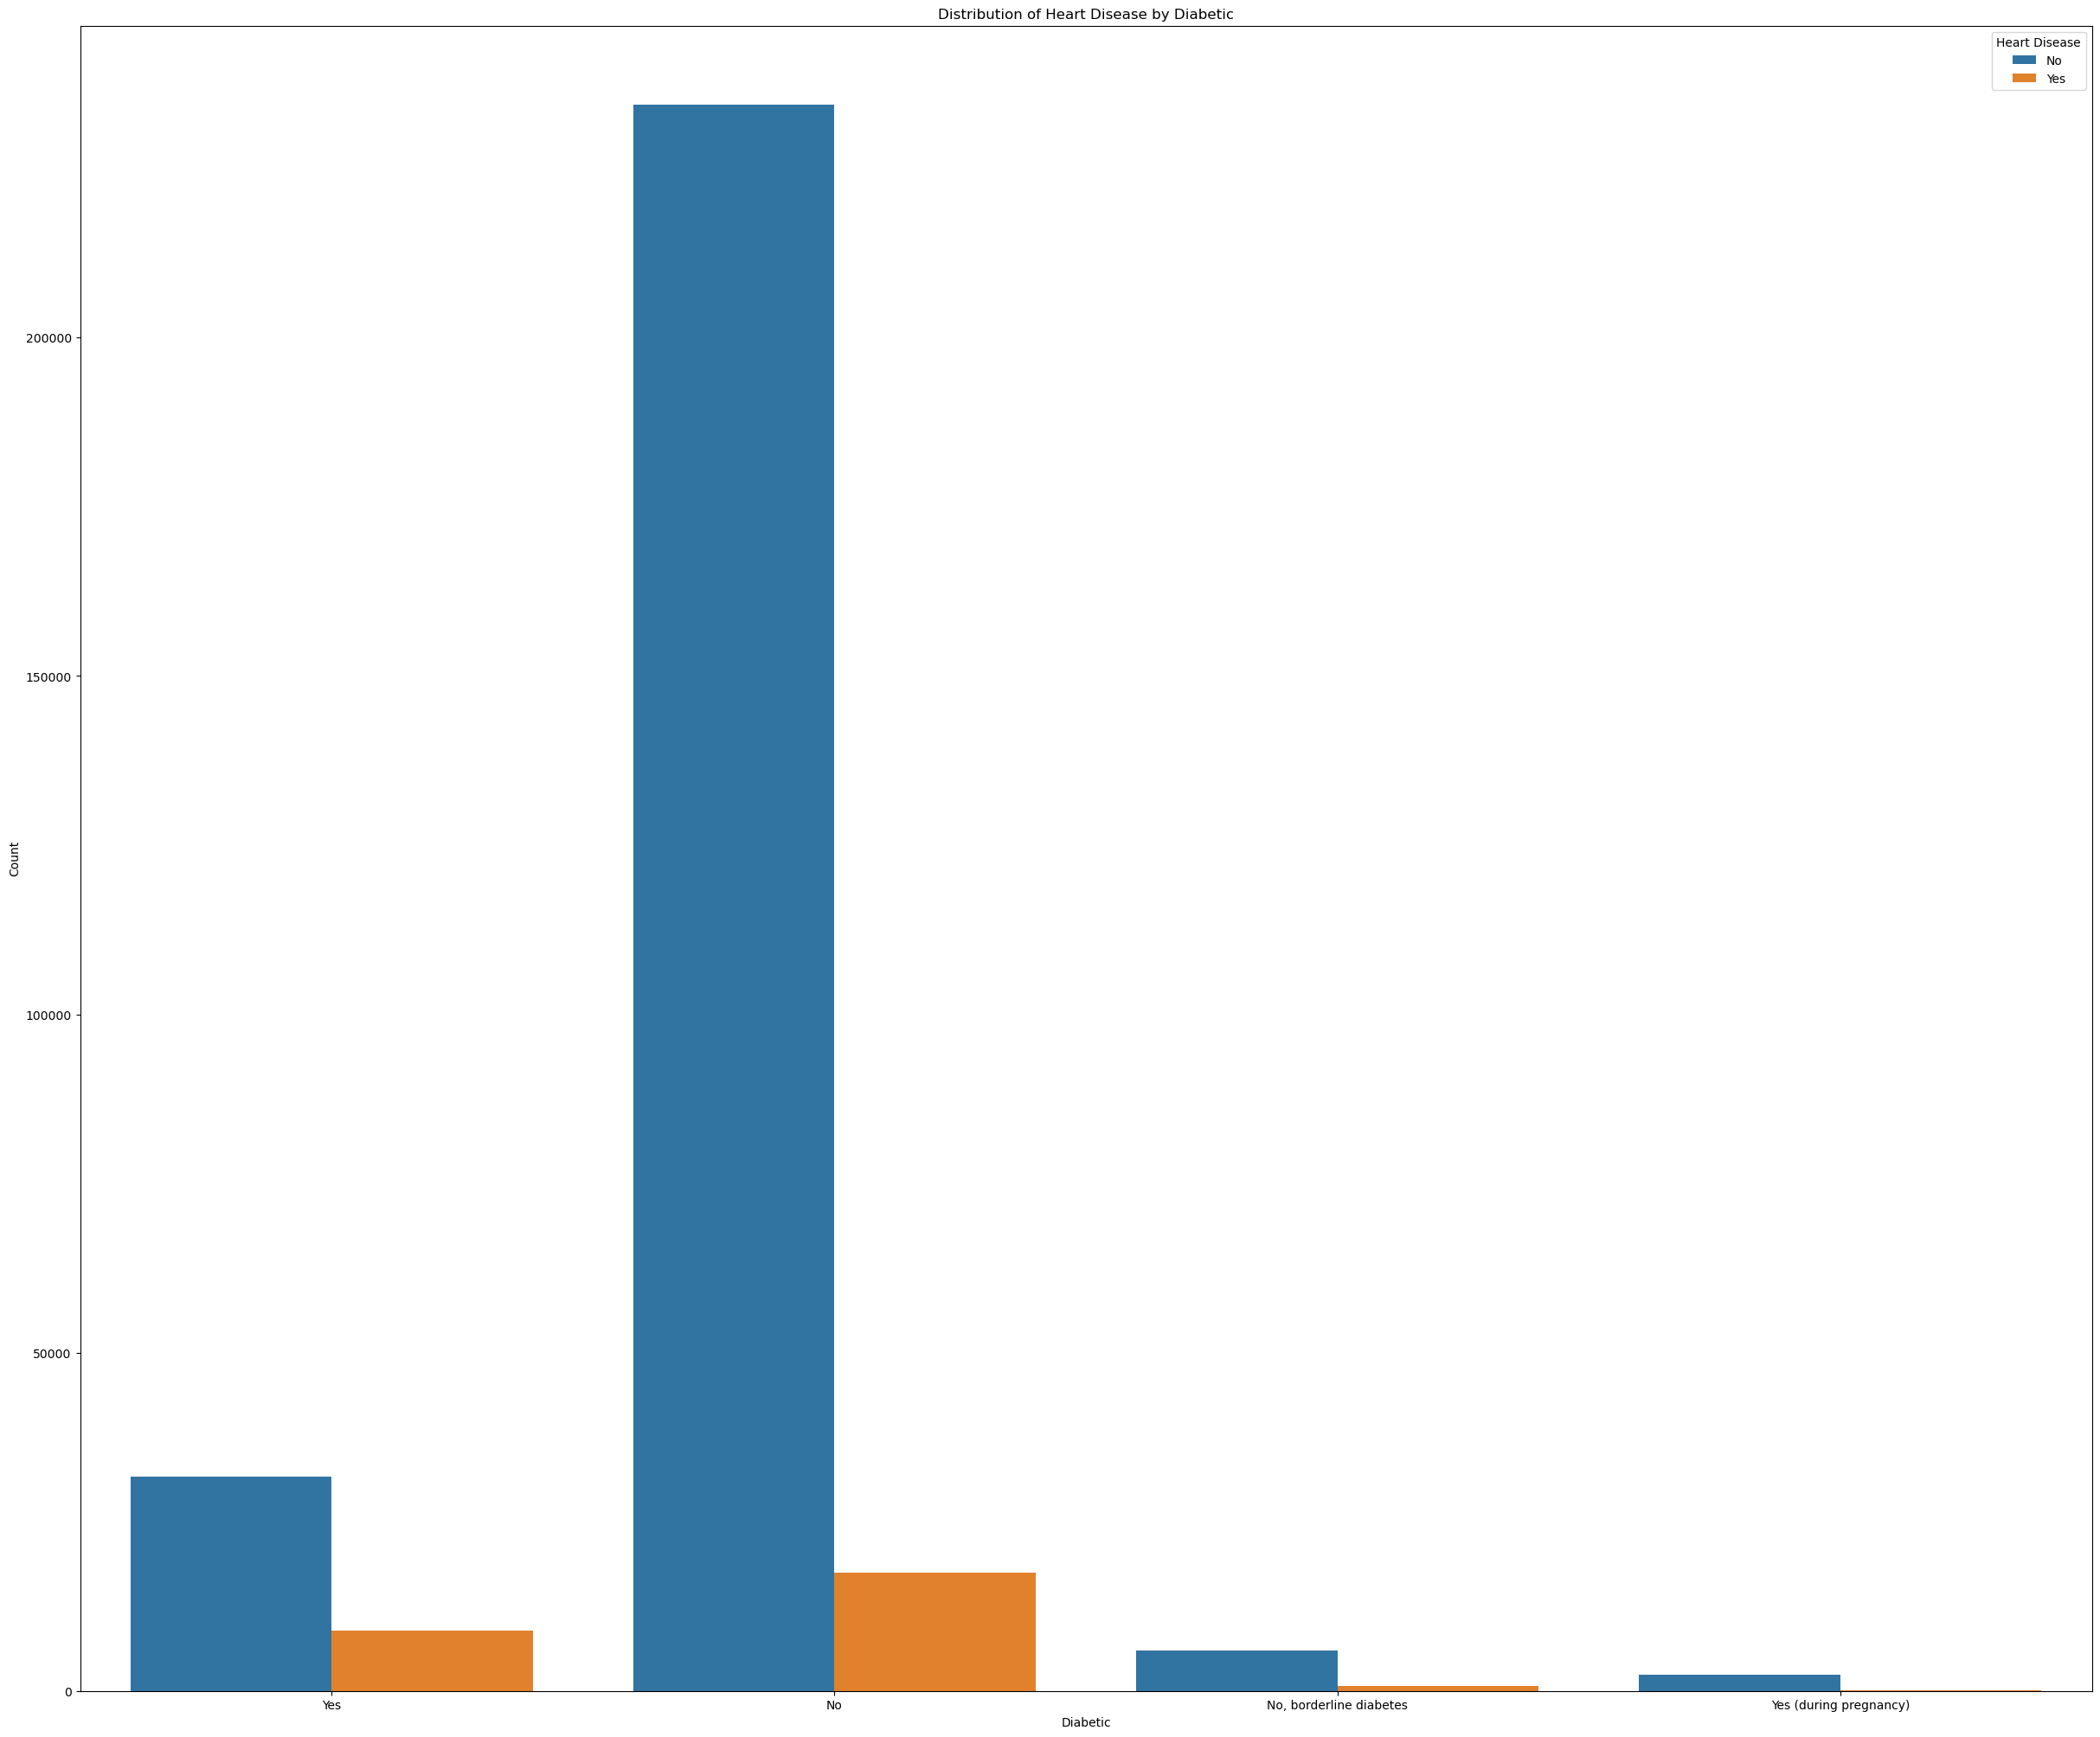

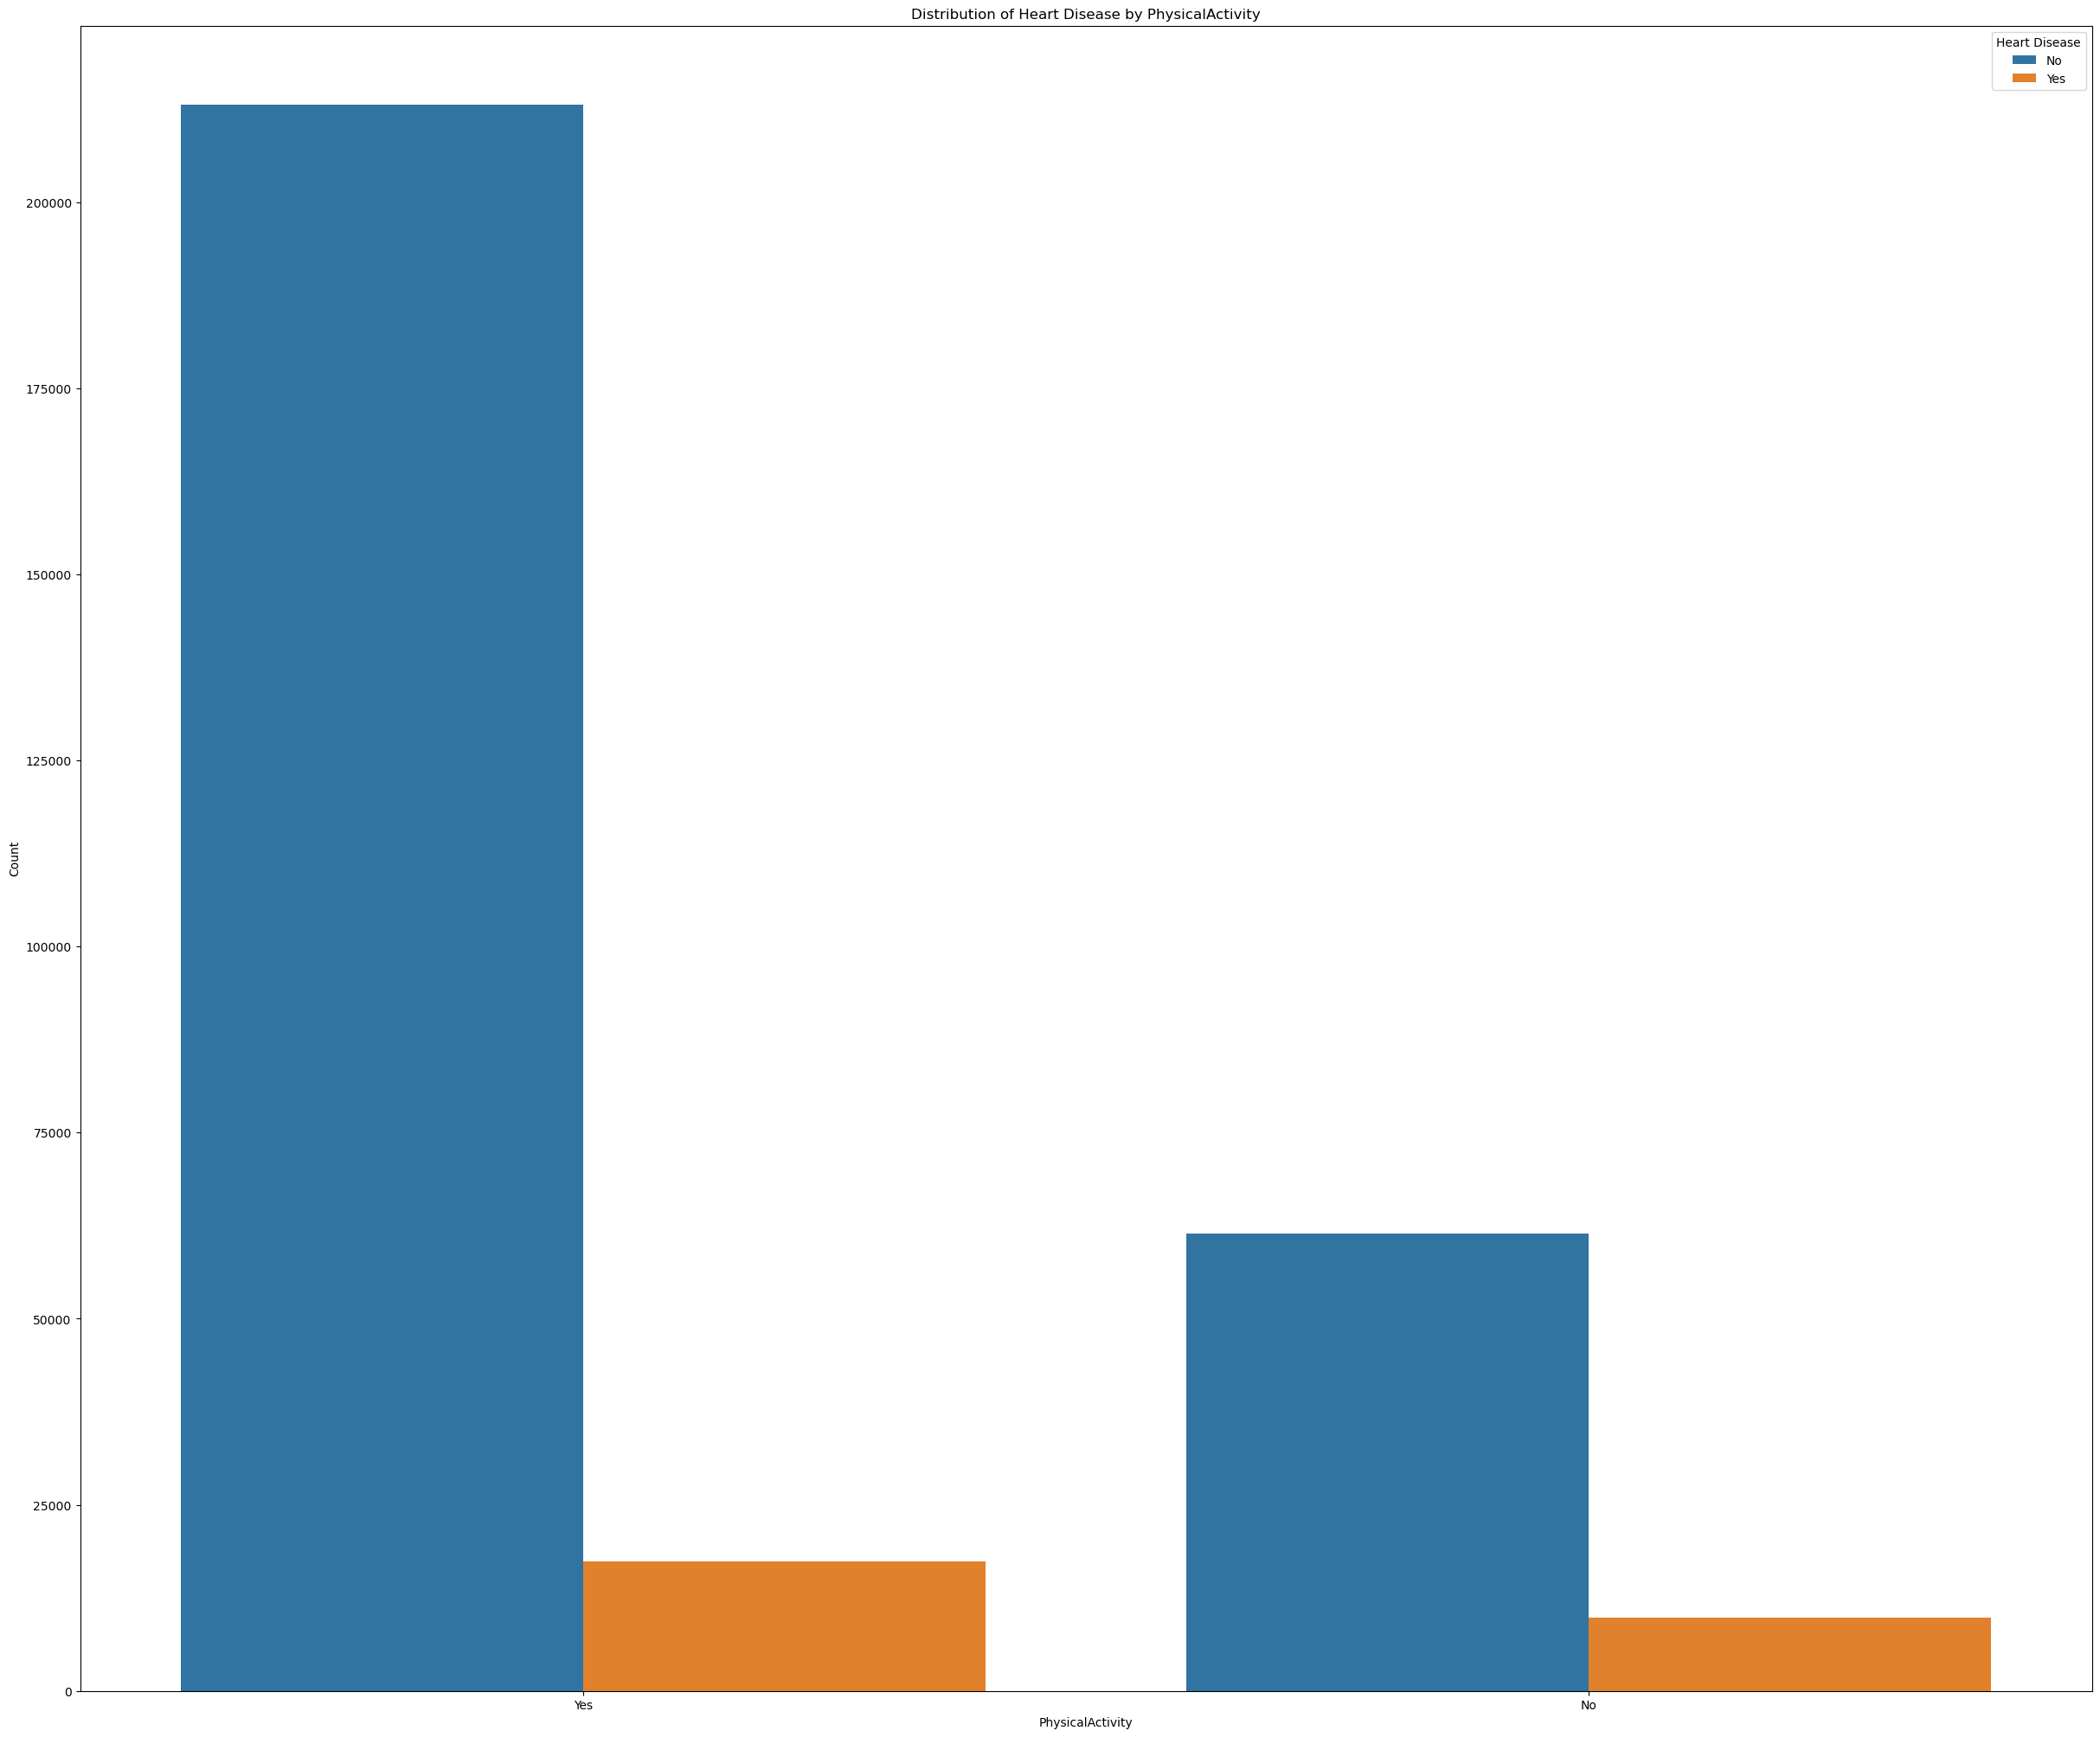

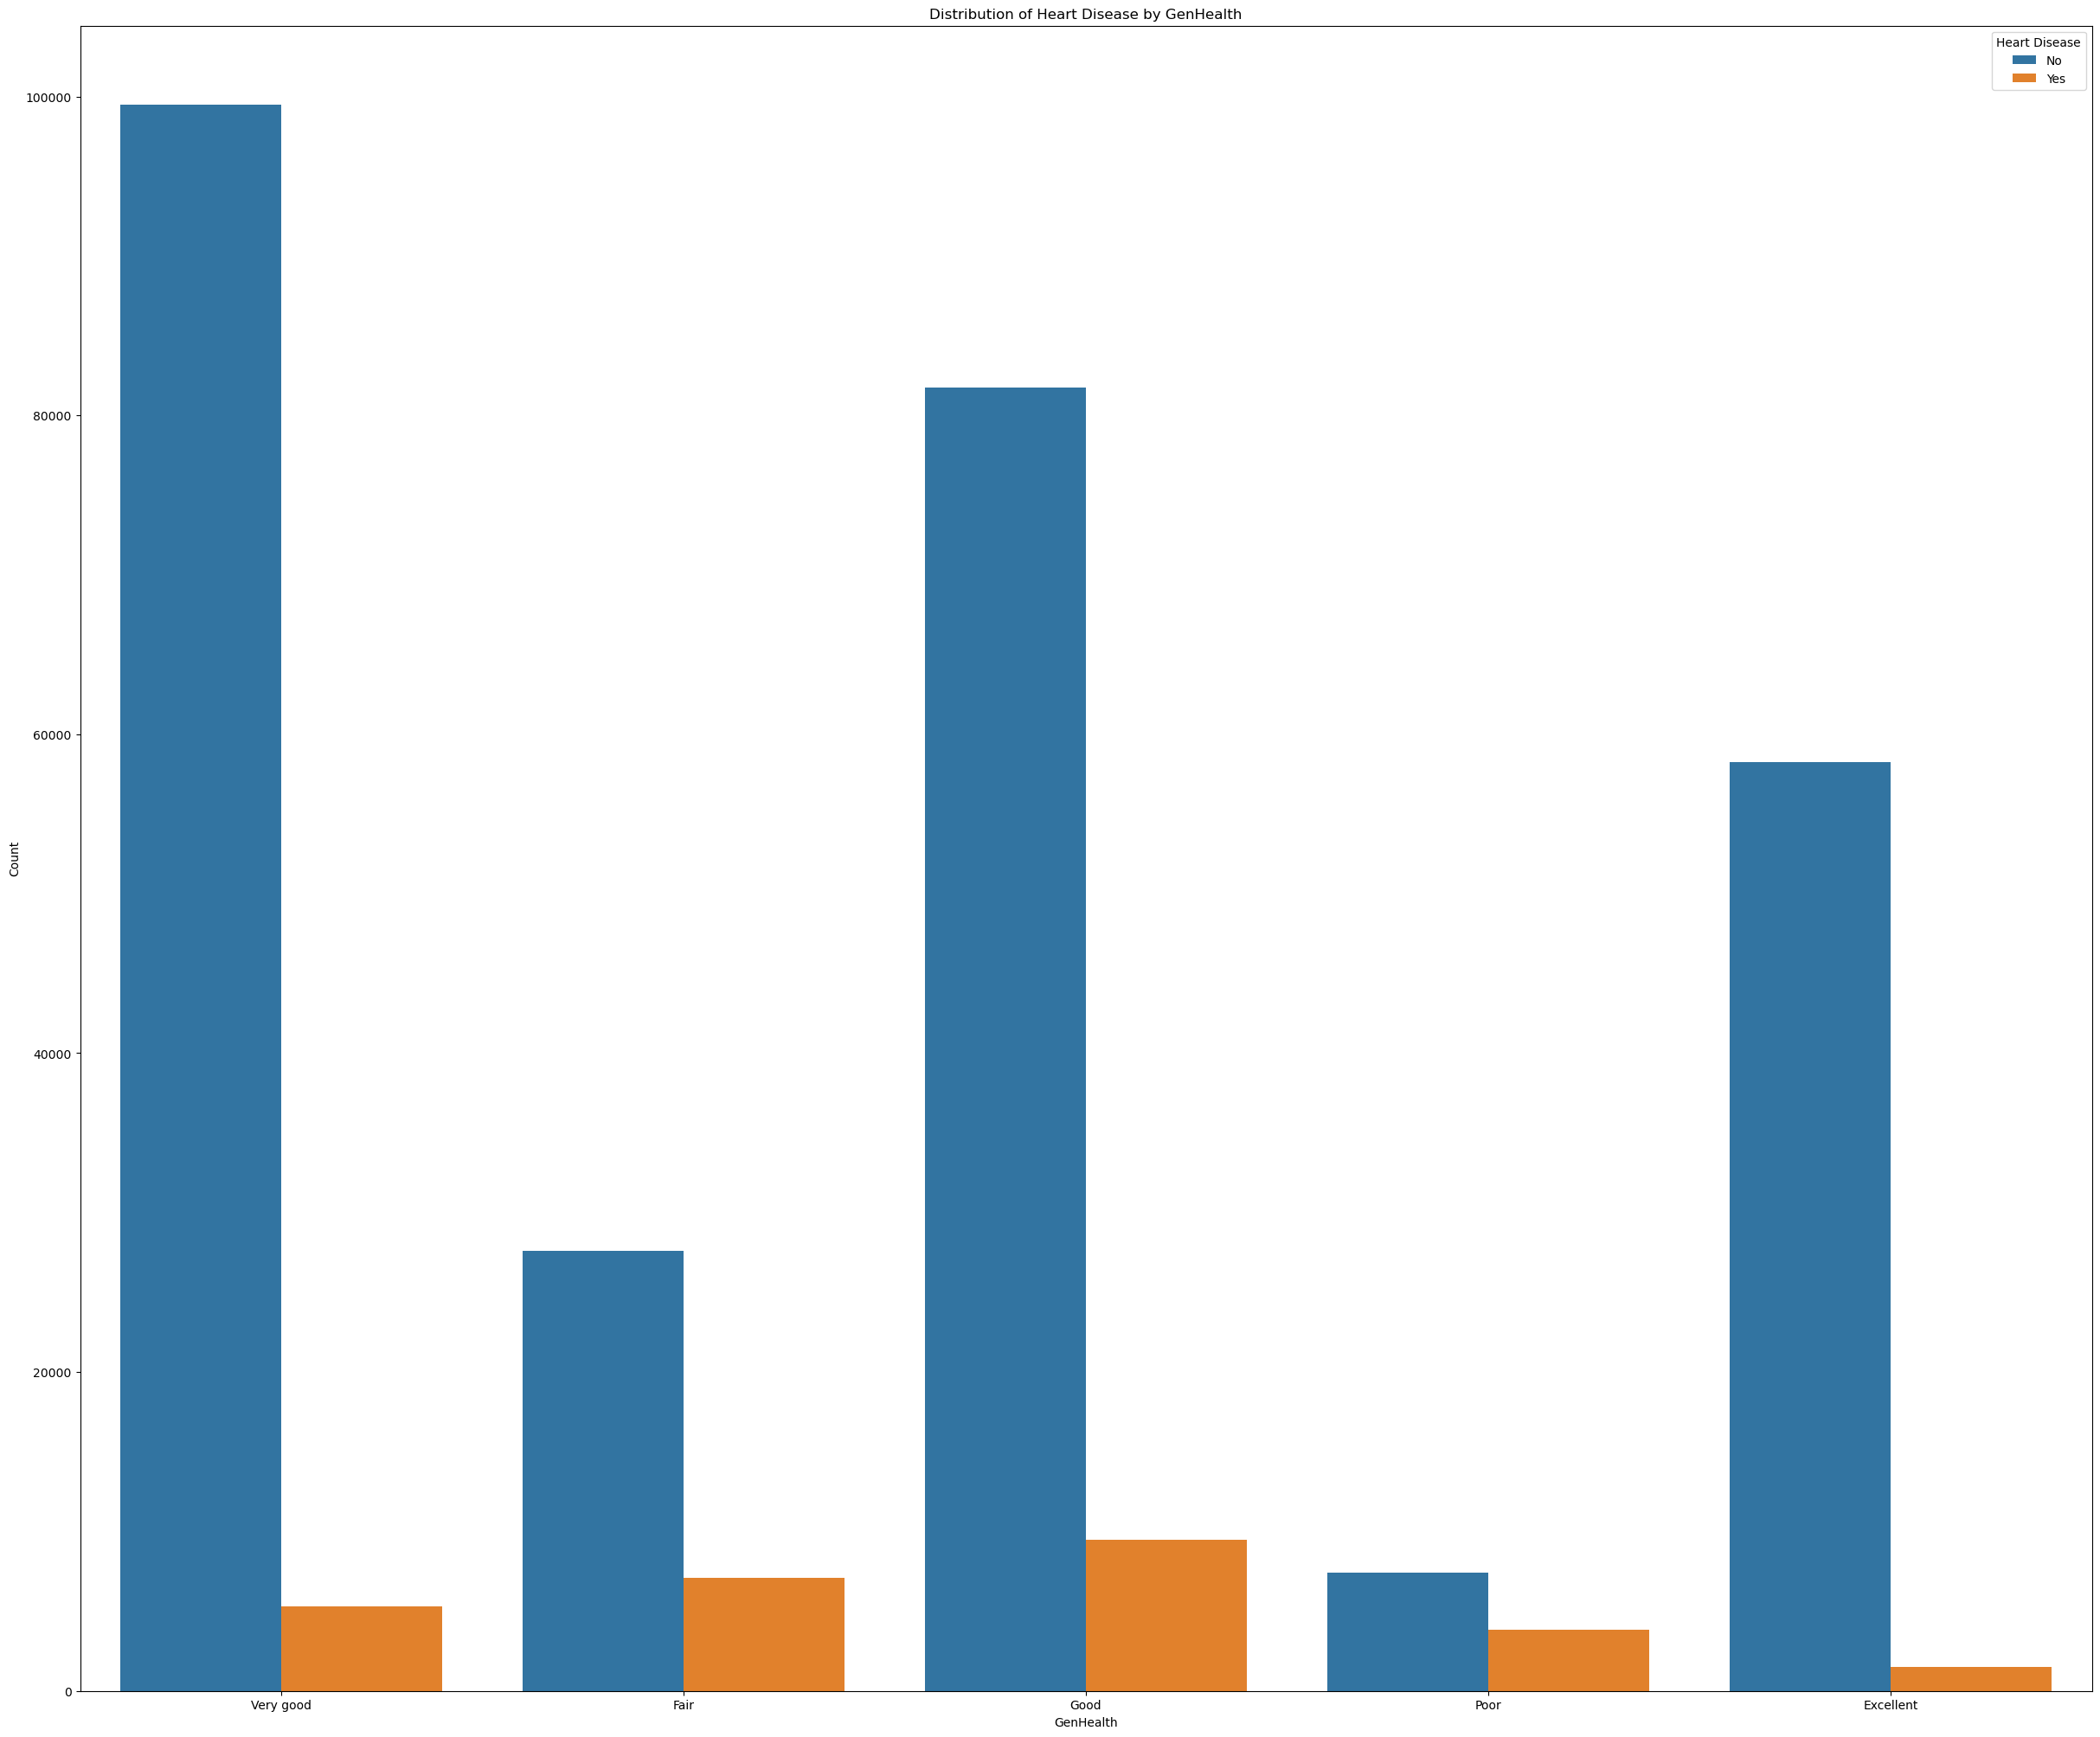

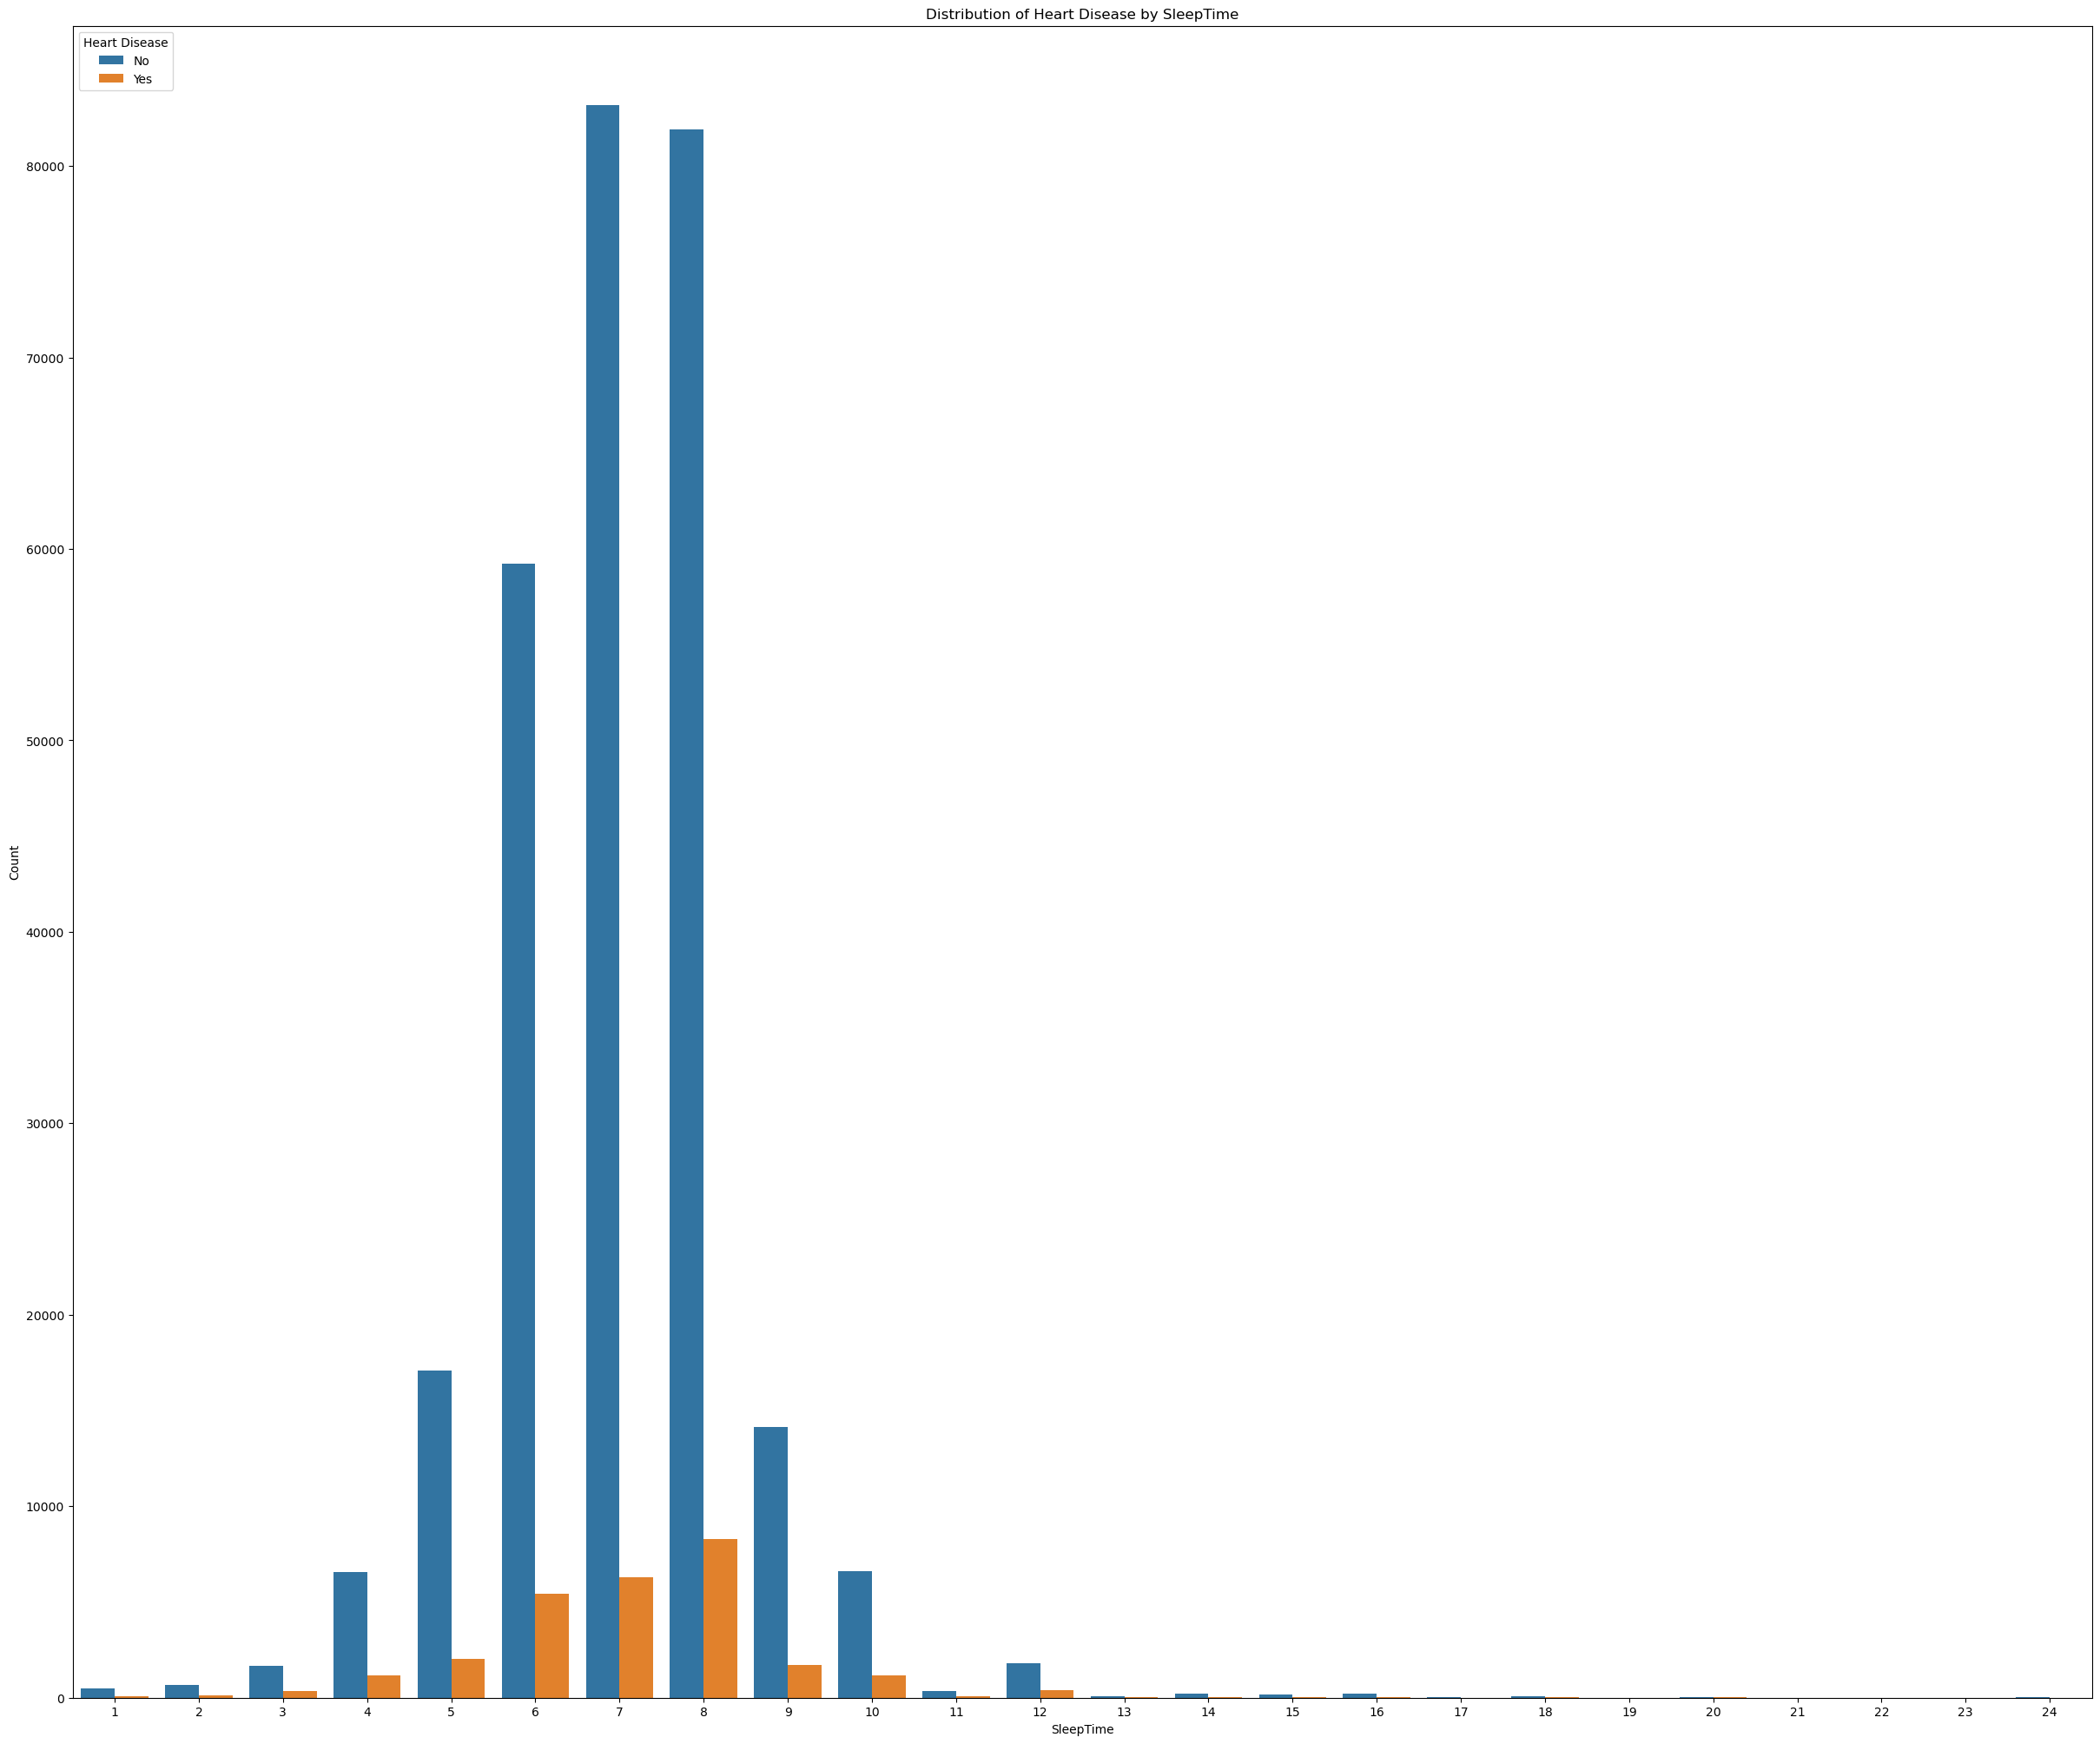

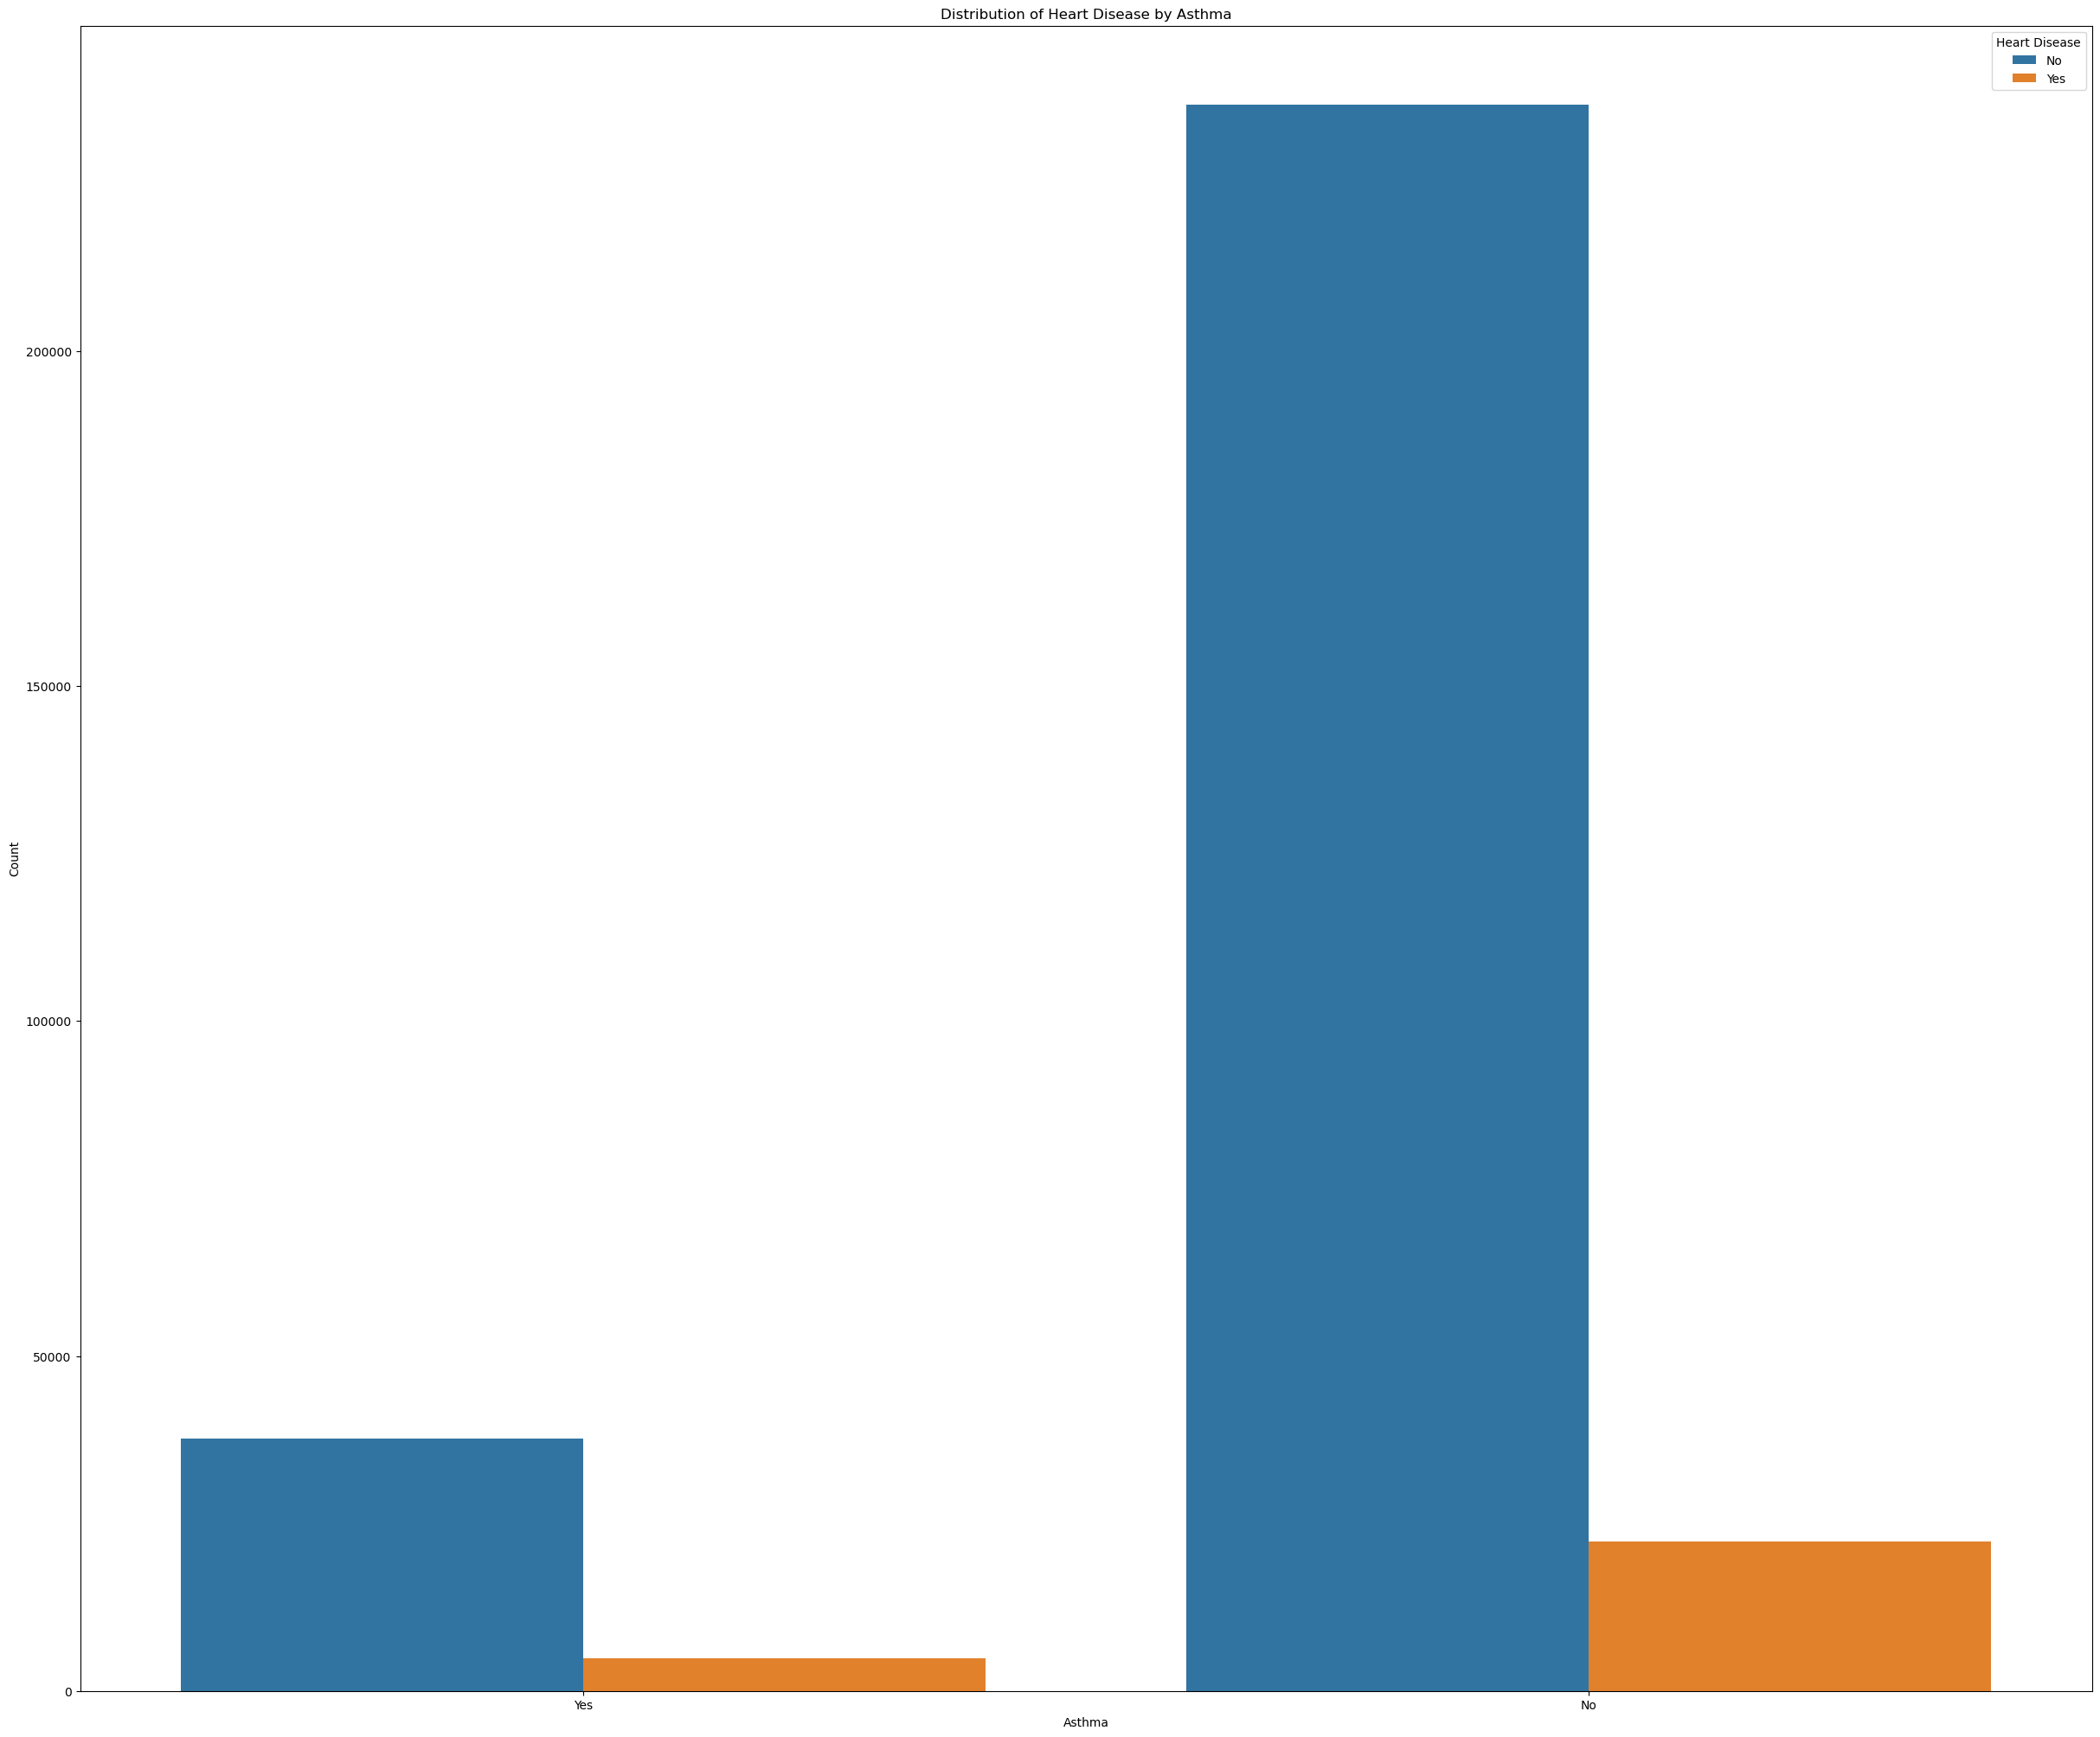

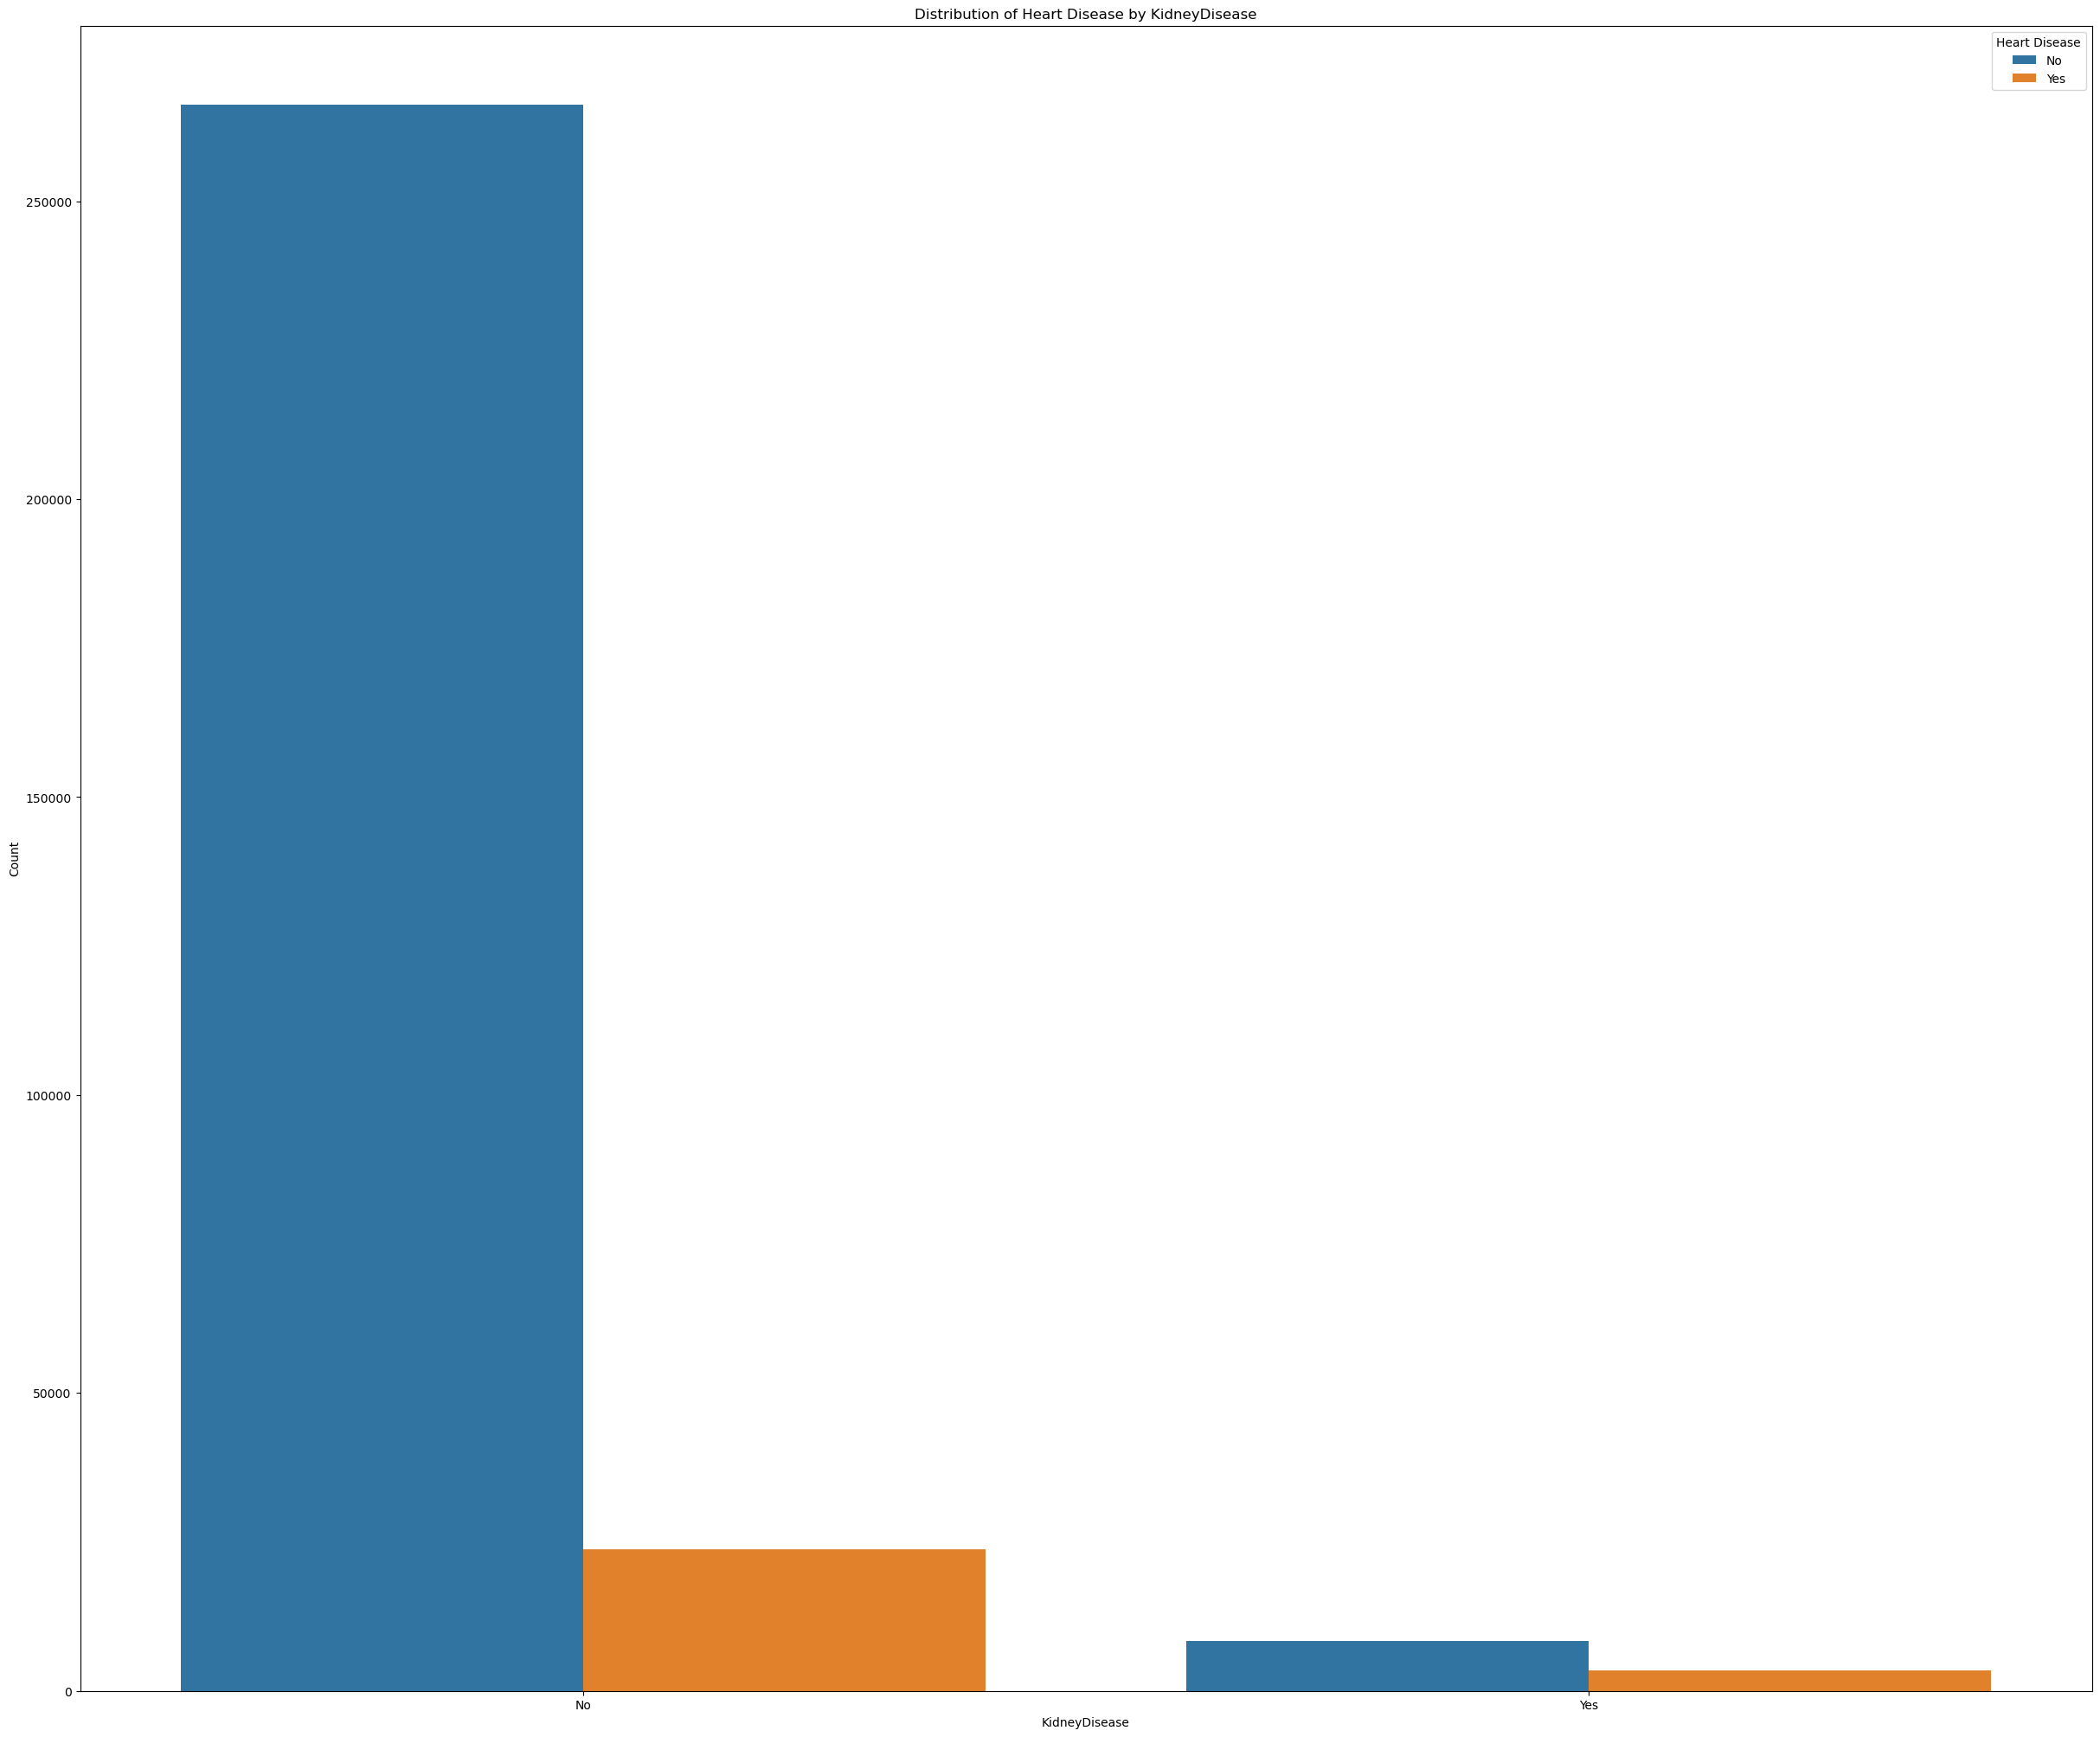

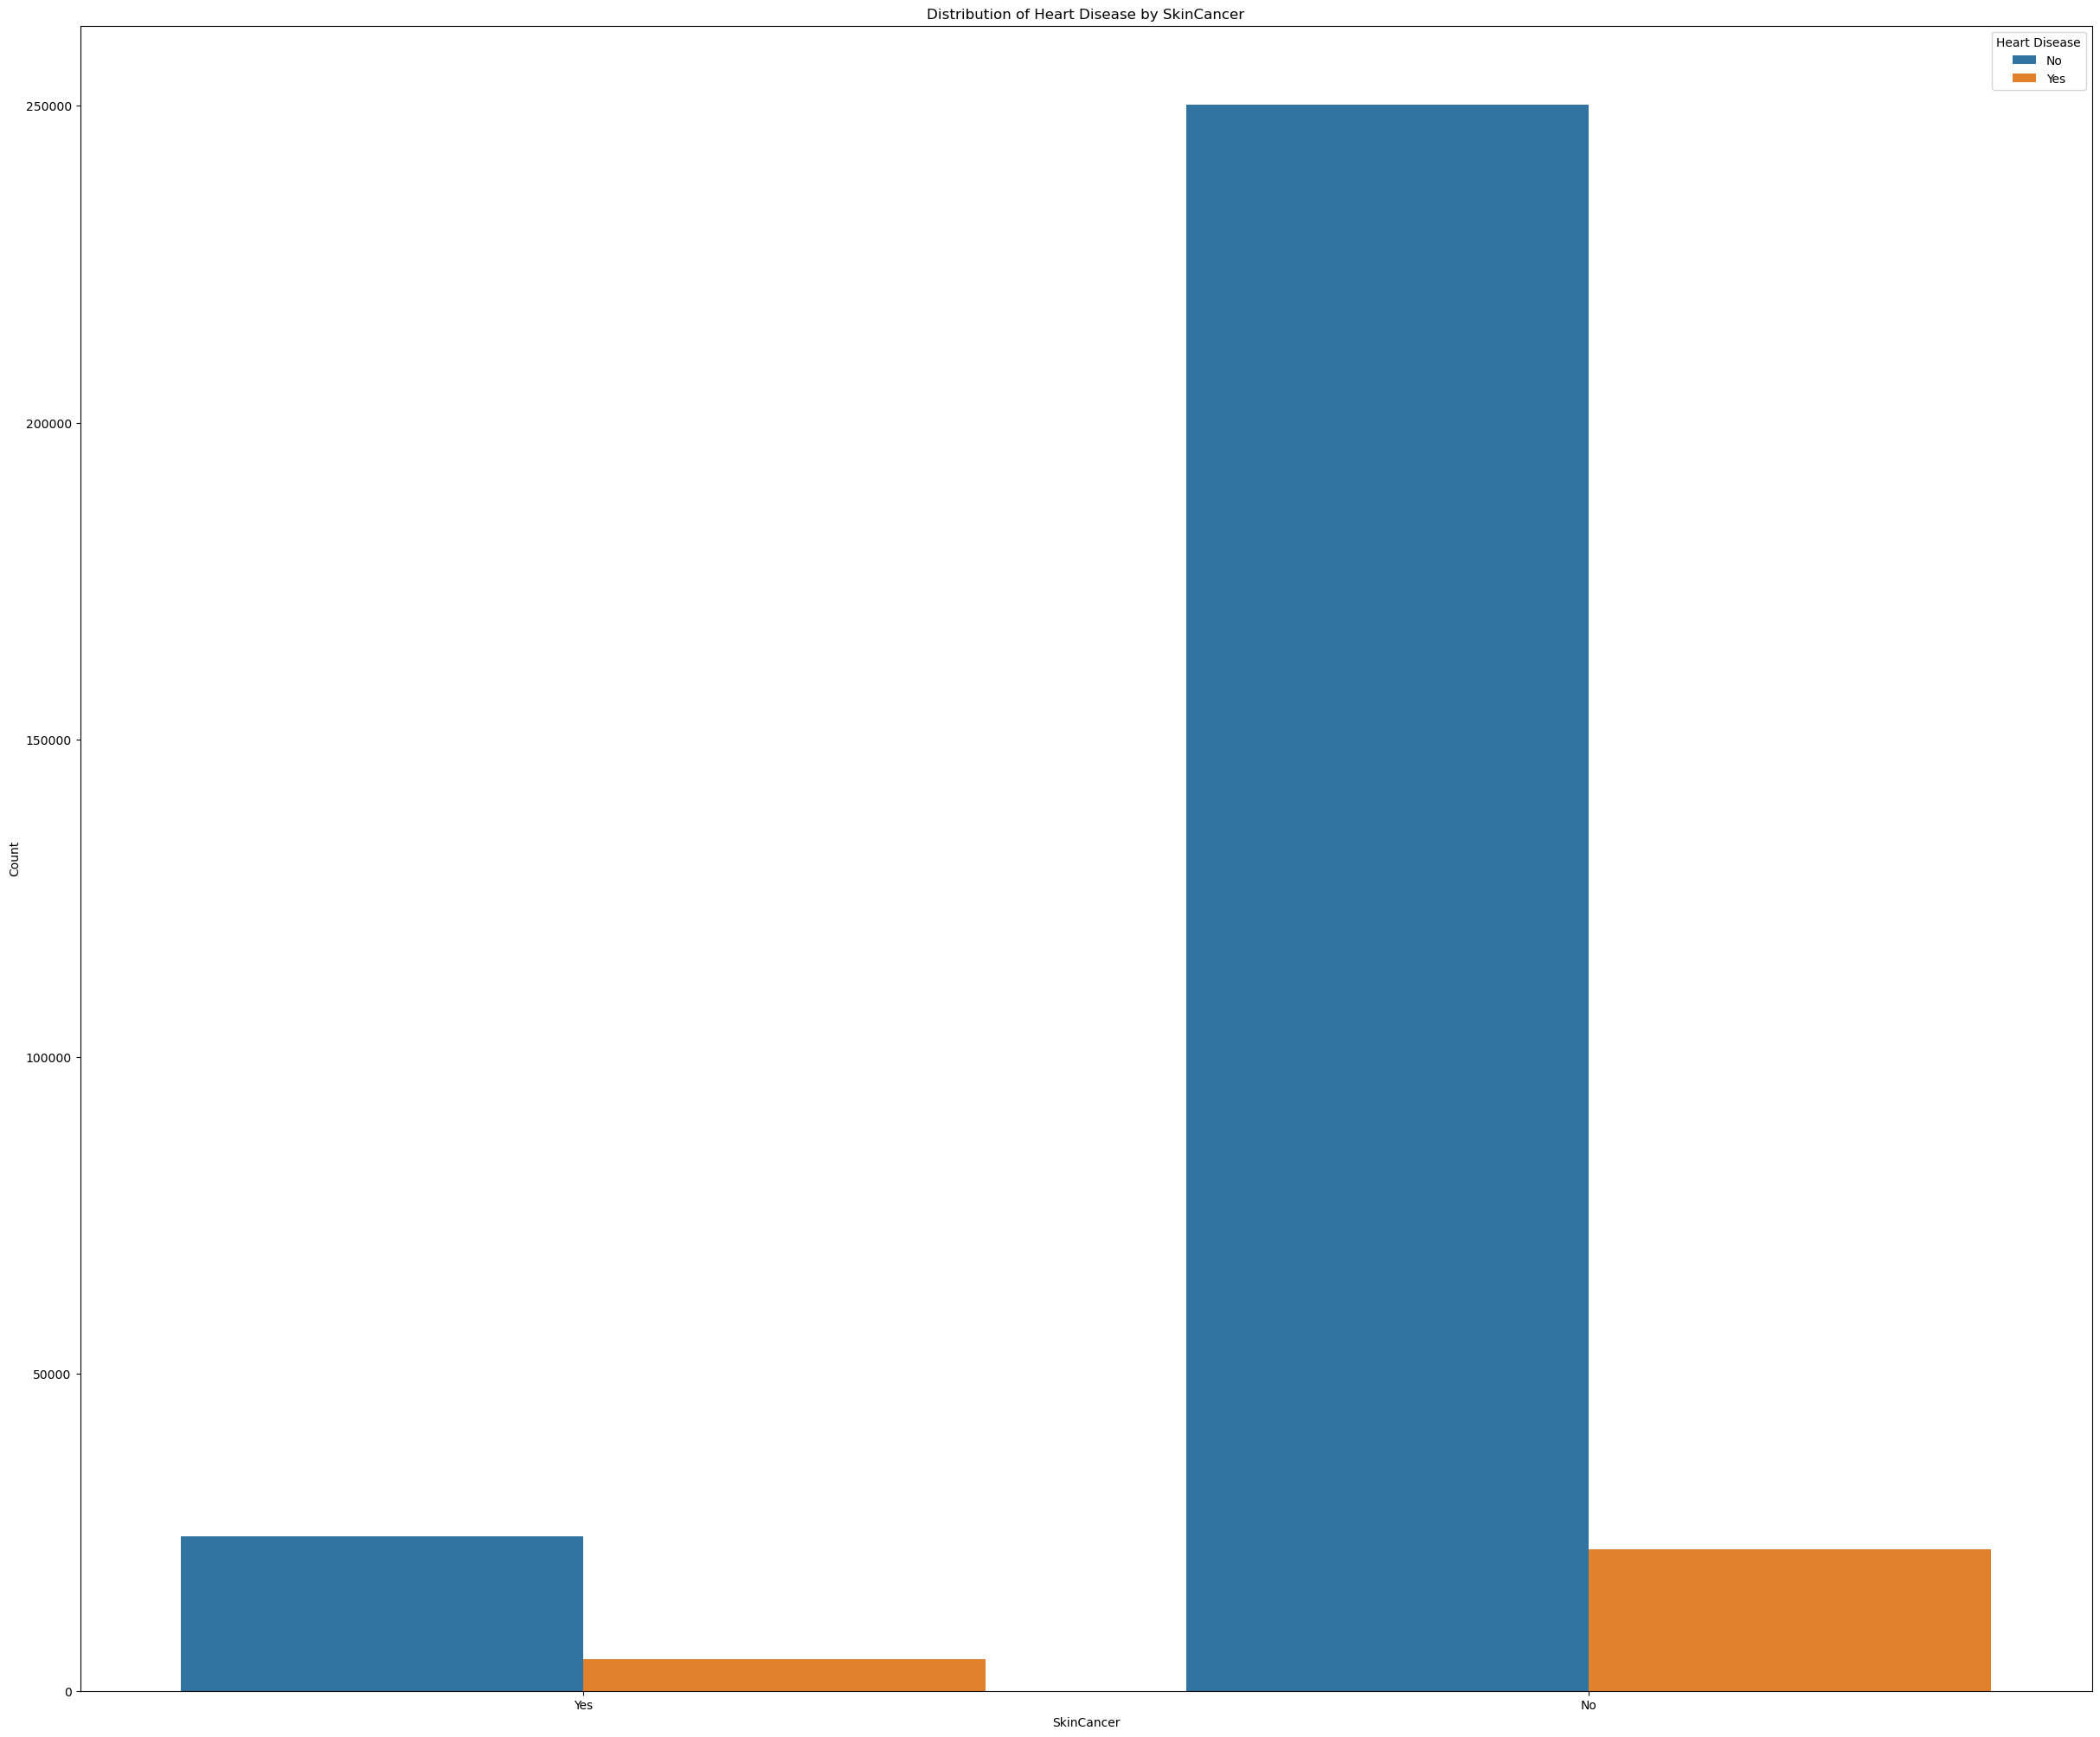

In [11]:
cat_features = ['BMI','Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity','GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer']

for feature in cat_features:
    plt.figure(figsize=(30, 25))
    sns.countplot(x=feature, hue='HeartDisease', data=df)
    plt.title(f"Distribution of Heart Disease by {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.legend(title="Heart Disease", labels=['No', 'Yes'])
    plt.show()

### 9. Check the unique categories in the column 'Diabetic'. Replace 'Yes (during pregnancy)' as 'Yes' and 'No, borderline diabetes' as 'No'.

In [12]:
df['Diabetic'].unique

<bound method Series.unique of 0         Yes
1          No
2         Yes
3          No
4          No
         ... 
319790    Yes
319791     No
319792     No
319793     No
319794     No
Name: Diabetic, Length: 301717, dtype: object>

In [13]:
print("Unique columns in 'Diabetic' column:", df['Diabetic'].unique())

Unique columns in 'Diabetic' column: ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']


In [14]:
df['Diabetic'] = df['Diabetic'].replace('Yes (during pregnancy)', 'Yes')
df['Diabetic'] = df['Diabetic'].replace('No, borderline diabetes', 'No')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [15]:
print("Unique columns in 'Diabetic' column:", df['Diabetic'].unique())

Unique columns in 'Diabetic' column: ['Yes' 'No']


### 10. For the target column 'HeartDiease', Replace 'No' as 0 and 'Yes' as 1. 

In [16]:
df['HeartDisease'] = df['HeartDisease'].replace('No', 0)
df['HeartDisease'] = df['HeartDisease'].replace('Yes', 1)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,0,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,0,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,0,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,0,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


### 11. Label Encode the columns "AgeCategory", "Race", and "GenHealth". Encode the rest of the columns using dummy encoding approach.

In [17]:
col_to_labencode = ["AgeCategory", "Race", "GenHealth"]

df[col_to_labencode] = df[col_to_labencode].apply(LabelEncoder().fit_transform)

In [18]:
df1 = pd.get_dummies(df, columns=['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer'], drop_first=True)
#df1.drop(columns=['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer'], inplace=True)
df1.head(50)

,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,0,16.60,3,30,7,5,4,5,1,0,0,0,0,1,1,1,0,1
1,0,20.34,0,0,12,5,4,7,0,0,1,0,0,0,1,0,0,0
2,0,26.58,20,30,9,5,1,8,1,0,0,0,1,1,1,1,0,0
3,0,24.21,0,0,11,5,2,6,0,0,0,0,0,0,0,0,0,1
4,0,23.71,28,0,4,5,4,8,0,0,0,1,0,0,1,0,0,0
5,1,28.87,6,0,11,2,1,12,1,0,0,1,0,0,0,0,0,0
6,0,21.63,15,0,10,5,1,4,0,0,0,0,0,0,1,1,0,1
7,0,31.64,5,0,12,5,2,9,1,0,0,1,0,1,0,1,0,0
8,0,26.45,0,0,12,5,1,5,0,0,0,0,0,0,0,0,1,0
9,0,40.69,0,0,9,5,2,10,0,0,0,1,1,0,1,0,0,0


### 12. Store the target column (i.e.'HeartDisease') in the y variable and the rest of the columns in the X variable.

In [19]:
y = df1["HeartDisease"]
x = df1.drop(columns=['HeartDisease'])

In [20]:
print("x (features): ", x.head())
print("y (target): ", y.head())

x (features):       BMI  PhysicalHealth  MentalHealth  AgeCategory  Race  GenHealth  \
0  16.60               3            30            7     5          4   
1  20.34               0             0           12     5          4   
2  26.58              20            30            9     5          1   
3  24.21               0             0           11     5          2   
4  23.71              28             0            4     5          4   

   SleepTime  Smoking_Yes  AlcoholDrinking_Yes  Stroke_Yes  DiffWalking_Yes  \
0          5            1                    0           0                0   
1          7            0                    0           1                0   
2          8            1                    0           0                0   
3          6            0                    0           0                0   
4          8            0                    0           0                1   

   Sex_Male  Diabetic_Yes  PhysicalActivity_Yes  Asthma_Yes  \
0         0   

### 13. Split the dataset into two parts (i.e. 70% train and 30% test) and print the shape of the train and test data

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [22]:
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (211201, 17)
Shape of x_test: (90516, 17)
Shape of y_train: (211201,)
Shape of y_test: (90516,)


### 14. Standardize the numerical columns using Standard Scalar approach for both train and test data.

In [23]:
num_col = x_train.select_dtypes(include=['float64', 'int64']).columns

x_train[num_col] = StandardScaler().fit_transform(x_train[num_col])
x_test[num_col] = StandardScaler().fit_transform(x_test[num_col])

In [24]:
print("Standardized X_train:")
print(x_train.head())
print("\nStandardized X_test:")
print(x_test.head())

Standardized X_train:
             BMI  PhysicalHealth  MentalHealth  AgeCategory  Race  GenHealth  \
176022 -1.132899       -0.439473     -0.384657            5     5          0   
209180  0.039479       -0.439473     -0.507567           11     5          2   
167240  0.039479       -0.439473     -0.507567            9     5          0   
8444   -0.413099       -0.439473      0.106980            9     5          4   
130663 -0.105716       -0.316708     -0.507567            7     4          4   

        SleepTime  Smoking_Yes  AlcoholDrinking_Yes  Stroke_Yes  \
176022   0.625112            1                    0           0   
209180  -0.737100            0                    0           0   
167240   0.625112            0                    0           0   
8444     0.625112            1                    0           0   
130663  -0.055994            1                    0           0   

        DiffWalking_Yes  Sex_Male  Diabetic_Yes  PhysicalActivity_Yes  \
176022               

### 15. Write a function.
- i) Which can take the model and data as inputs.
- ii) Fits the model with the train data.
- iii) Makes predictions on the test set.
- iv) Returns the Accuracy Score.

In [25]:
def model_evaluation(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

### 16. Use the function and train a Logistic regression, KNN, Naive Bayes, Decision tree, Random Forest, Adaboost, GradientBoost, and Stacked Classifier models and make predictions on test data and evaluate the models, compare and write your conclusions and steps to be taken in future in order to improve the accuracy of the model.

In [28]:
lg_model = LogisticRegression()
lg_accuracy = model_evaluation(lg_model, x_train, y_train, x_test, y_test)
print("Logistic Regression accuracy:", lg_accuracy)

knn_model = KNeighborsClassifier()
knn_accuracy = model_evaluation(knn_model, x_train, y_train, x_test, y_test)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)

nb_model = GaussianNB()
nb_accuracy = model_evaluation(nb_model, x_train, y_train, x_test, y_test)
print("Naive Bayes Accuracy:", nb_accuracy)

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_accuracy = model_evaluation(dt_model, x_train, y_train, x_test, y_test)
print("Decision Tree Accuracy:", dt_accuracy)

# Random Forest
rf_model = RandomForestClassifier()
rf_accuracy = model_evaluation(rf_model, x_train, y_train, x_test, y_test)
print("Random Forest Accuracy:", rf_accuracy)

# AdaBoost
adaboost_model = AdaBoostClassifier()
adaboost_accuracy = model_evaluation(adaboost_model, x_train, y_train, x_test, y_test)
print("AdaBoost Accuracy:", adaboost_accuracy)

# Gradient Boosting
gradboost_model = GradientBoostingClassifier()
gradboost_accuracy = model_evaluation(gradboost_model, x_train, y_train, x_test, y_test)
print("Gradient Boosting Accuracy:", gradboost_accuracy)

base_models = [
    ('lg_model', lg_model),
    ('knn_model', knn_model),
    ('nb_model', nb_model),
    ('dt_model', dt_model),
    ('rf_model', rf_model),
    ('adaboost_model', adaboost_model),
    ('gradboost_model', gradboost_model)
]
stacked_model = VotingClassifier(estimators=base_models, voting='soft')
stacked_accuracy = model_evaluation(stacked_model, x_train, y_train, x_test, y_test)

# Compare model performances
model_accuracies = {
    'Logistic Regression': lg_accuracy,
    'K-Nearest Neighbors': knn_accuracy,
    'Naive Bayes': nb_accuracy,
    'Decision Tree': dt_accuracy,
    'Random Forest': rf_accuracy,
    'AdaBoost': adaboost_accuracy,
    'Gradient Boosting': gradboost_accuracy,
    'Stacked Classifier': stacked_accuracy,
}

print("\nModel Comparisons:")
for model_name, accuracy in model_accuracies.items():
    print(f"{model_name}: Accuracy = {accuracy:.4f}")

# Identify the best model
best_model = max(model_accuracies, key=model_accuracies.get)
print("\nBest Model:", best_model)
print("Accuracy of Best Model:", model_accuracies[best_model])

Logistic Regression accuracy: 0.9099385743956869


C:\Users\SANATH\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K-Nearest Neighbors Accuracy: 0.9016416987052013
Naive Bayes Accuracy: 0.8407132440673472
Decision Tree Accuracy: 0.8549980114012992
Random Forest Accuracy: 0.8992664280348226
AdaBoost Accuracy: 0.9108555393521587
Gradient Boosting Accuracy: 0.9116620266030315

Model Comparisons:
Logistic Regression: Accuracy = 0.9099
K-Nearest Neighbors: Accuracy = 0.9016
Naive Bayes: Accuracy = 0.8407
Decision Tree: Accuracy = 0.8550
Random Forest: Accuracy = 0.8993
AdaBoost: Accuracy = 0.9109
Gradient Boosting: Accuracy = 0.9117
Stacked Classifier: Accuracy = 0.9053

Best Model: Gradient Boosting
Accuracy of Best Model: 0.9116620266030315


### Conclusion

----
## Happy Learning:)
----